## Final Project Submission

Please fill out:
* Student name: Kiarash Ahmadi
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Introduction:

This project consisted of obtaining a dataset of customer data for the business SyriaTel which is a telecommunications company. From there I was tasked to build a classifier to predict whether a customer will stop doing business (churn) with SyriaTel. The framework behind developing this model involved following the OSEMiN Data Science Process. This process consists of 5 key steps: 

* Obtain: 
    * Extracting the data 
* Scrub: 
    * Preprocessing the data for the model 
    * Examples include normalizing the data, removing or replacing null values, or dealing with outliers
* Explore: 
    * This step tends to blend in with the "Scrub" step 
    * Check for multicollinearity, visualize and explore the data to have an understanding of how to prepare the predictors and whether any can be dropped in order to have more accurate model
    * Analyzing the dataset for patterns when it comes to certain predictors leading to whether the customer will churn or not
* Model: 
    * The data is modeled and evaluated based on a number of parameters
    * From there, different trails are run in which the data is again scrubbed and explored to see how it can improve the model potentially
* Interpret: 
    * The results of the model are interpreted and echoed to stakeholders .
    * From here you decide if the model is satisfactory or if further steps are needed to improve 

# Imports

First, import the necessary packages for this project.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb




# Obtaining Data 

Let's extract the data by using pandas. Let's make sure that the dataset is correct by checking the first 5 rows. 

In [317]:
df = pd.read_csv('churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Scrubbing


Let's make the column names more suitable for python by adding a "_" so that they can more easily be accessed using pandas. We'll also check to ensure that there are no null values in the dataset

In [318]:
df.columns = df.columns.map(lambda col: col.replace(' ','_'))
print(df.columns)
df.isna().sum()

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

Let's next check our data for any place holders by evaluating the value counts for each column

In [319]:
for col in df.columns:
    print('-----------------------------')
    print(f"Column Name: {col}")
    print(df[col].value_counts())

-----------------------------
Column Name: state
WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
-----------------------------
Column Name: account_length
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64
-----------------------------
Column Name: area_code
415    1655
510     840
408     838
Name: area_code, dtype: int64
-----------------------------
Column Name: phone_number
340-6221    1
360-8919  

The data seems pretty clean as there are no placeholders or null values. Let's next check the dtype of each of the columns.

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

The dtype for this dataset seems proper for the most part in that no columns that are numerical columns are listed as an object dtype. Let's next shift our focus to transforming the data points (international plan and voicemail plan as seen by the value counts) that have values of "yes" or "no" and make those a binary value where 1 means yes and 0 means no. We will also do the same for the churn column where a value of 1 will mean True and a value of 0 will mean False. This will give us consistency for when we create our classifiers.

In [321]:
df['international_plan'] = df['international_plan'].map({'no': 0, 'yes': 1})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'no': 0, 'yes': 1})
df['churn'] = df['churn'].map({False: 0, True: 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   int64  
 5   voice_mail_plan         3333 non-null   int64  
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

What we will do next is evaluate whether any columns can be dropped based on the information they provide relative to the target column which is churn. Thus, let's check the churn rate by area code.

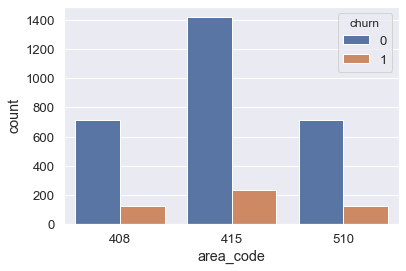

In [322]:
sns.set(font_scale = 1.2)                                                  
df['area_code'] = df['area_code']
sns.countplot(x='area_code', hue='churn', data=df);


From this I gain that the phone number is less important and the focus should be more on the area code. Thus, there is a chance we can drop phone number but let's first check how many phone numbers are in the dataset.

In [323]:
print(f'Number of rows in the dataset is: {df.shape[0]}')
x = df['phone_number'].nunique()
print(f'Number of phone numbers in the dataset is: {x}')

Number of rows in the dataset is: 3333
Number of phone numbers in the dataset is: 3333


Okay, this means there is a phone number for each customer and thus this datapoint is of no help to us and it will be dropped.

In [324]:
df.drop('phone_number', axis=1, inplace=True)

Let's next add 3 new columns that quantify the total charge, calls, and minutes. To do this let's sum up the day, evening, night, and international values for minutes, calls, and charge.

In [325]:
# a sum of the total minutes on call for the respective customer
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
# a sum of the total calls for the respective customer
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']
# a sum of the total charges for the respective customer
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

Let's now shift focus to developing new columns that focus the charge per call for day, evening, night, and international calls. 

In [326]:
df['day_charge_per_call'] = round(df['total_day_charge'] / (df['total_day_calls']), 3)
df['eve_charge_per_call'] = round(df['total_eve_charge'] / (df['total_eve_calls']), 3)
df['night_charge_per_call'] = round(df['total_night_charge'] / (df['total_night_calls']), 3)
df['intl_charge_per_call'] = round(df['total_intl_charge'] / (df['total_intl_calls']), 3)

Now, let's evaluate whether this caused a scenario where a value was divided by zero. 

In [327]:
df.isna().sum()

state                      0
account_length             0
area_code                  0
international_plan         0
voice_mail_plan            0
number_vmail_messages      0
total_day_minutes          0
total_day_calls            0
total_day_charge           0
total_eve_minutes          0
total_eve_calls            0
total_eve_charge           0
total_night_minutes        0
total_night_calls          0
total_night_charge         0
total_intl_minutes         0
total_intl_calls           0
total_intl_charge          0
customer_service_calls     0
churn                      0
total_minutes              0
total_calls                0
total_charge               0
day_charge_per_call        2
eve_charge_per_call        1
night_charge_per_call      0
intl_charge_per_call      18
dtype: int64

It looks like our suspicion was correct! Thus, to fix this let's add a really small number in the denominator. That should do the trick. Let's also add an additional column that looks at the total charge per call.

In [328]:
df['day_charge_per_call'] = round(df['total_day_charge'] / (df['total_day_calls'] + 0.0000000000001), 3)
df['eve_charge_per_call'] = round(df['total_eve_charge'] / (df['total_eve_calls'] + 0.0000000000001), 3)
df['night_charge_per_call'] = round(df['total_night_charge'] / (df['total_night_calls'] + 0.0000000000001), 3)
df['intl_charge_per_call'] = round(df['total_intl_charge'] / (df['total_intl_calls'] + 0.0000000000001), 3)
df['total_charge_per_call'] = round(df['total_charge'] / (df['total_calls'] + 0.0000000000001), 3)
df.isna().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
total_minutes             0
total_calls               0
total_charge              0
day_charge_per_call       0
eve_charge_per_call       0
night_charge_per_call     0
intl_charge_per_call      0
total_charge_per_call     0
dtype: int64

Great! Now let's focus on adding more new columns. Let's also add a column for charge per minute for day, evening, night and international calls. Note that we will also add a really small number in denominator to ensure no null values are created. 

In [329]:
df['day_charge_per_min'] = round(df['total_day_charge'] / (df['total_day_minutes'] + 0.0000000000001), 3)
df['eve_charge_per_min'] = round(df['total_eve_charge'] / (df['total_eve_minutes'] + 0.0000000000001), 3)
df['night_charge_per_min'] = round(df['total_night_charge'] / (df['total_night_minutes'] + 0.0000000000001), 3)
df['intl_charge_per_min'] = round(df['total_intl_charge'] / (df['total_intl_minutes'] + 0.0000000000001), 3)
df['total_charge_per_min'] = round(df['total_charge'] / (df['total_minutes'] + 0.0000000000001), 3)
df.isna().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
total_minutes             0
total_calls               0
total_charge              0
day_charge_per_call       0
eve_charge_per_call       0
night_charge_per_call     0
intl_charge_per_call      0
total_charge_per_call     0
day_charge_per_min        0
eve_charge_per_min        0
night_charge_per_min      0
intl_charge_per_min       0
total_charge_per_min      0
dtype: int64

Let's next analyze the churn rate by state to see if there is potential for a potential the addition of another column. 

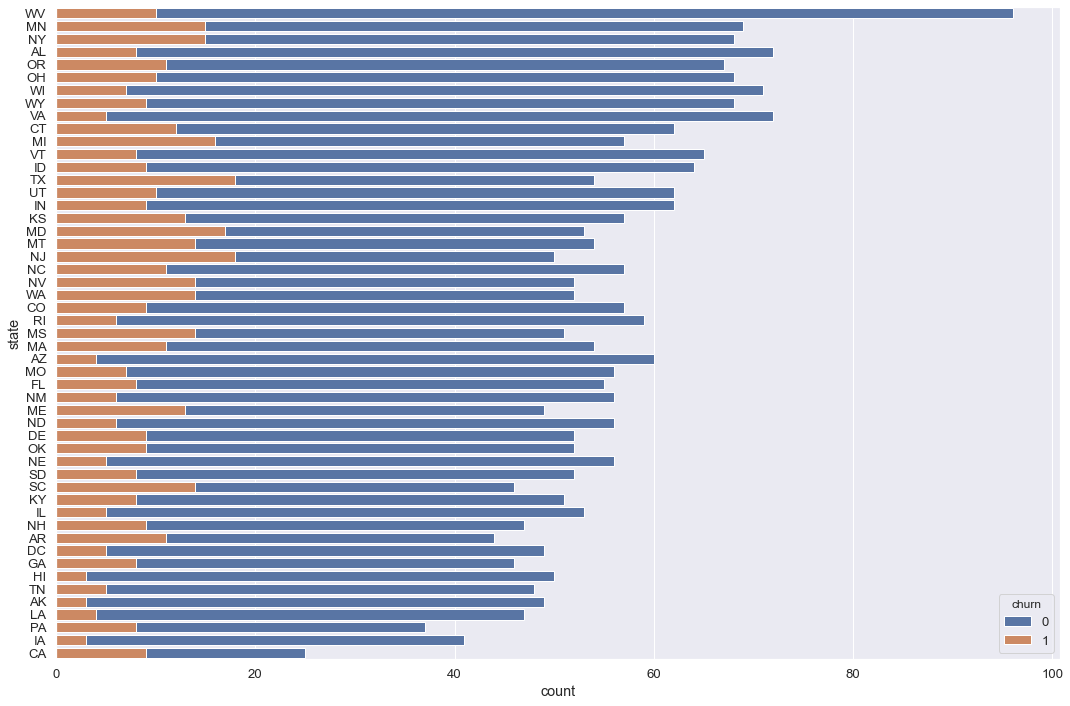

In [330]:
sns.set(font_scale = 1.2)                                                  
plt.figure(figsize = (18,12)) 
sns.countplot(y = 'state', hue = 'churn',  order = df['state'].value_counts().index, dodge = False, data = df);

As the plot above indicates, there is an uneven distribution of churn rate among states. To help with representing this later on in the model creation of a classifier, we will add a new column that represents the percentage of the total population of each state from a dataset found online. This dataset will be transformed and then merged with the current DataFrame "df". 

In [331]:
df_pop = pd.read_csv('populationbystate.csv').drop(['Rank','Population'], axis = 1)
df_pop.rename(columns = {'State': 'state','Percent of Total': 'percentage'}, inplace = True)
df_pop.percentage = df_pop.loc[:,'percentage'].str.replace('%', '').astype('float64')
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       51 non-null     object 
 1   percentage  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [332]:
df = pd.merge(left=df, right=df_pop, left_on='state', right_on='state', how='left')

# Exploratory Data Analysis

This section of the project consists of preparing the data in a way that will ensure an accurate and well-performing model. Obviously a lot of this has already been done in the Scrubbing section. These two sections often blend in easily. However, another key point of interest in this section is to evaluate the data to find patterns in hopes to answer questions and have concepts in mind for when the model creation begins. Let's first evaluate the amount of customers that churn and from there we will look at the distribution of float and int dtype columns in the dataset. 

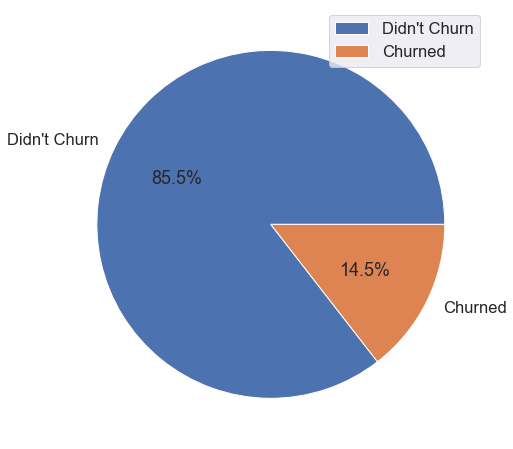

In [384]:
value_counts = np.array(df.churn.value_counts())
labels = ["Didn't Churn", "Churned"]
plt.figure(figsize = (12,8))
plt.pie(value_counts, labels = labels, autopct='%1.1f%%');
plt.legend()
plt.savefig('images/pie_chart.png',transparent=True)
plt.show()

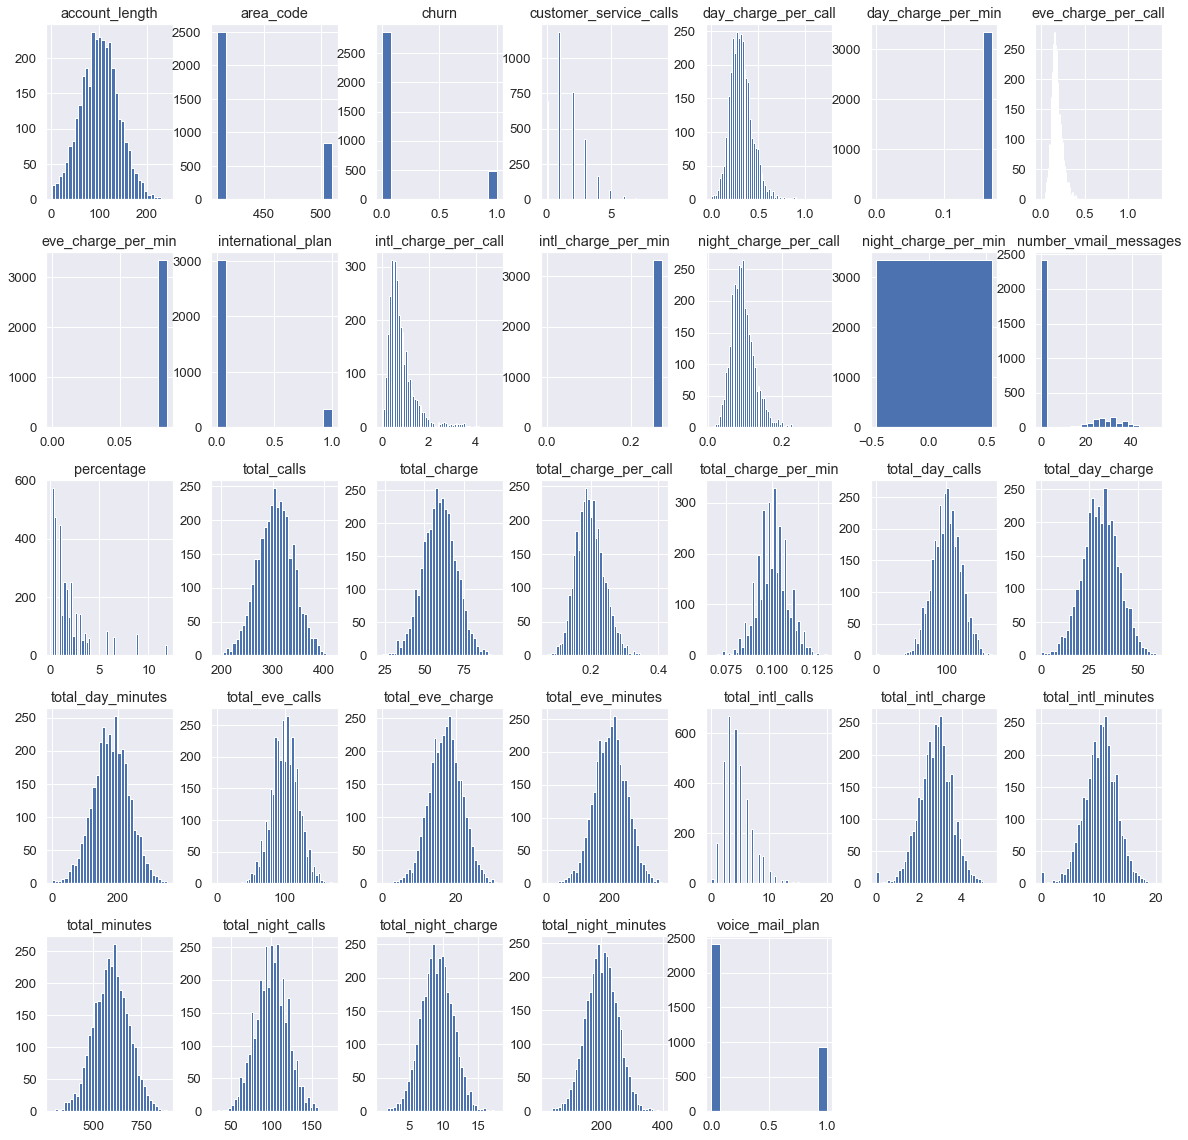

In [334]:
df.hist(bins = 'auto', layout=(5,7), figsize = (20,20))
plt.show()


The majority of this data is normally distributed where as some columns have some positive skewness. What we will do next is answer the following question:

## Are customers in certain areas more likely to churn?

To answer this question let's first group the dataset by state and whether the customer churns or not.

In [335]:
df_churn = pd.DataFrame(df.groupby('state')['churn'].value_counts(normalize = True))
df_churn.columns = ['value']
df_churn = df_churn.reset_index()

Ok, so we have now created a new DataFrame that is grouped by state and the proportion of customers that churned or did not relative to the total. Let's now classify the top states which will be the states in which more than 20% of the states have churned. 

In [336]:
top_states = list(df_churn.state[(df_churn.churn == 1) & (df_churn.value > .2)])
df_churn[(df_churn.churn == 1) & (df_churn.value > .2)]

,state,churn,value
9,CA,1,0.264706
41,MD,1,0.242857
43,ME,1,0.209677
45,MI,1,0.219178
51,MS,1,0.215385
53,MT,1,0.205882
63,NJ,1,0.264706
67,NV,1,0.212121
81,SC,1,0.233333
87,TX,1,0.250000


It seems as though customers in the states seen above churn at a higher rate. The recommendation from this would be to look into the competitors at these states in order to evaluate how one can change their business model to decrease the churn rate in those states. Let's now evaluate different columns in the dataset to see if there's a large difference when looking at states that are classified as "top states" where the churn rate is high vs. states that are not "top states"

In [337]:
columns = ['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
           'total_minutes', 'total_calls', 'total_charge',
       'day_charge_per_call', 'eve_charge_per_call', 'night_charge_per_call',
       'intl_charge_per_call', 'total_charge_per_call', 'day_charge_per_min',
       'eve_charge_per_min', 'night_charge_per_min', 'intl_charge_per_min',
       'total_charge_per_min']

for column in columns:
    print('-------------------------')
    print(column)
#    print(f'top states: {df[df.state.isin(top_states)][column].mean()}')
#    print(f'other states: {df[~df.state.isin(top_states)][column].mean()}')
    print(df[df.state.isin(top_states)][column].mean() - df[~df.state.isin(top_states)][column].mean())
print('-------------------------')


-------------------------
number_vmail_messages
-0.1957552776721192
-------------------------
total_day_minutes
2.5087889882084085
-------------------------
total_day_calls
-0.16872503803728023
-------------------------
total_day_charge
0.42648220568647943
-------------------------
total_eve_minutes
0.885529787942005
-------------------------
total_eve_calls
0.051368153290226815
-------------------------
total_eve_charge
0.07527024296306806
-------------------------
total_night_minutes
-2.014070820655064
-------------------------
total_night_calls
0.5873787561810673
-------------------------
total_night_charge
-0.09089631276151877
-------------------------
total_intl_minutes
0.1780031618486202
-------------------------
total_intl_calls
0.01885222518067664
-------------------------
total_intl_charge
0.048162502377335326
-------------------------
customer_service_calls
0.0859880182578927
-------------------------
total_minutes
1.558251117343957
-------------------------
total_calls
0.488

These results will give us insight into what columns need further study or if we are pursuing a fool's errand in developing this cutoff as top states and none top states. Based off the information we now have, we will transition to analyzing the churn rate in areas in a different way with the first focus being by state. 

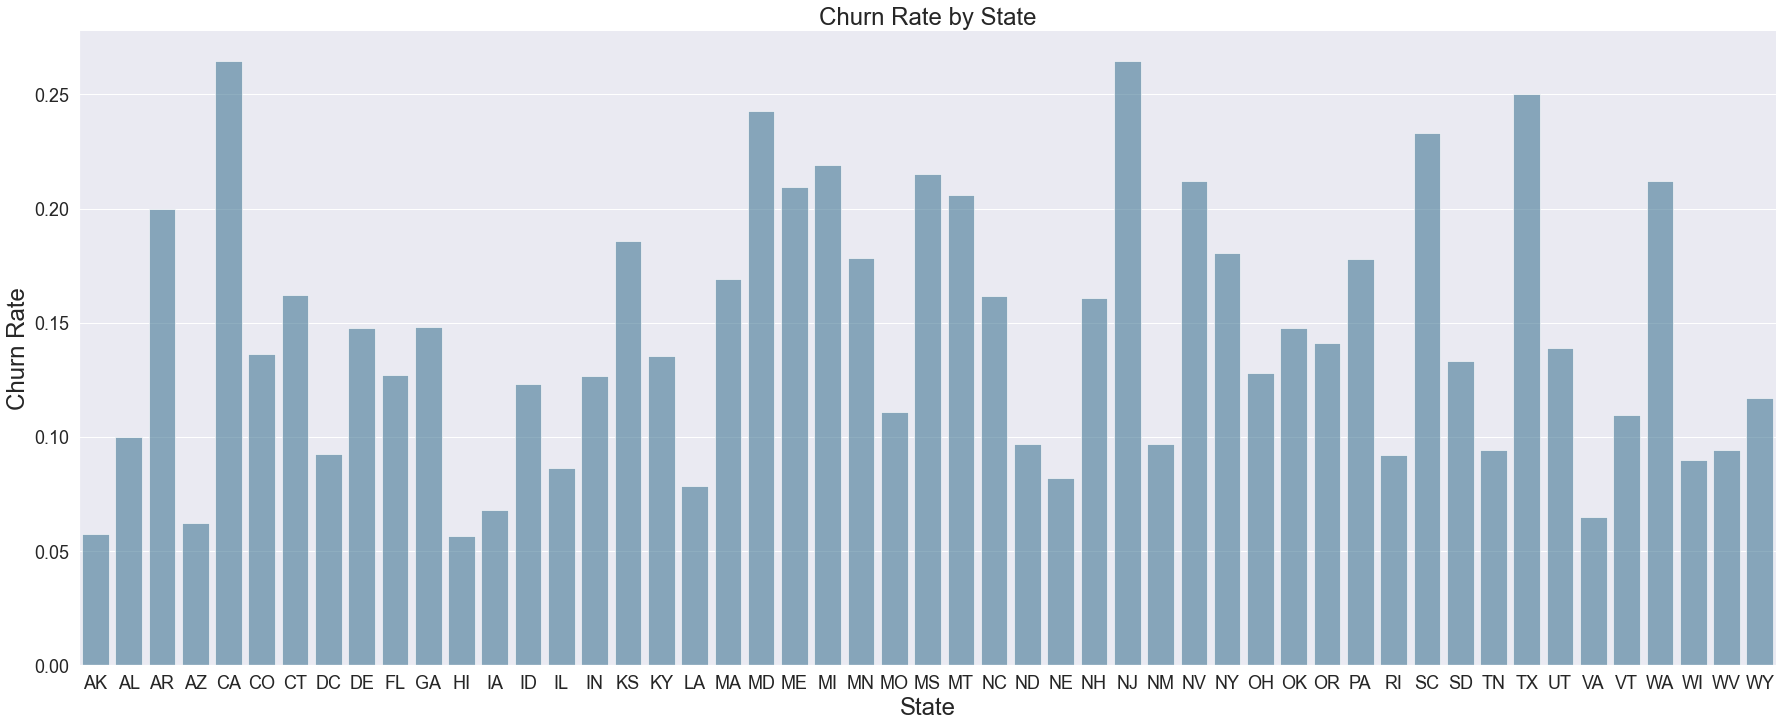

In [338]:
sns.set(font_scale = 1.5) ;                                                 
sns.catplot(data = df_churn[df_churn.churn == 1], kind = 'bar',
            x = 'state', y = 'value', hue = 'churn',
            palette = 'mako', alpha = .6, height = 10, aspect = 2.5, legend = False);
plt.title('Churn Rate by State', fontsize = 24);
plt.xlabel('State', fontsize = 24)
plt.ylabel('Churn Rate', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

Based on this category plot, there is not much insight that can be gained. What we will focus next on is grouping these states into 4 regions:
- West
- South
- Midwest
- Northeast

These are the Census Bureau-designated regions retrieved from Wikipedia. Let's now introduce a region column to the dataset and evaluate whether there is a higher churn rate by region.

In [339]:
west = ['AZ', 'CO','ID', 'MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
south = ['DE','FL','GA','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','SD','ND']
northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
region = []
for state in df.state:
    if state in west:
        region.append('West')
    elif state in south:
        region.append('South')
    elif state in midwest:
        region.append('Midwest')
    elif state in northeast:
        region.append('Northeast')
df['region'] = region

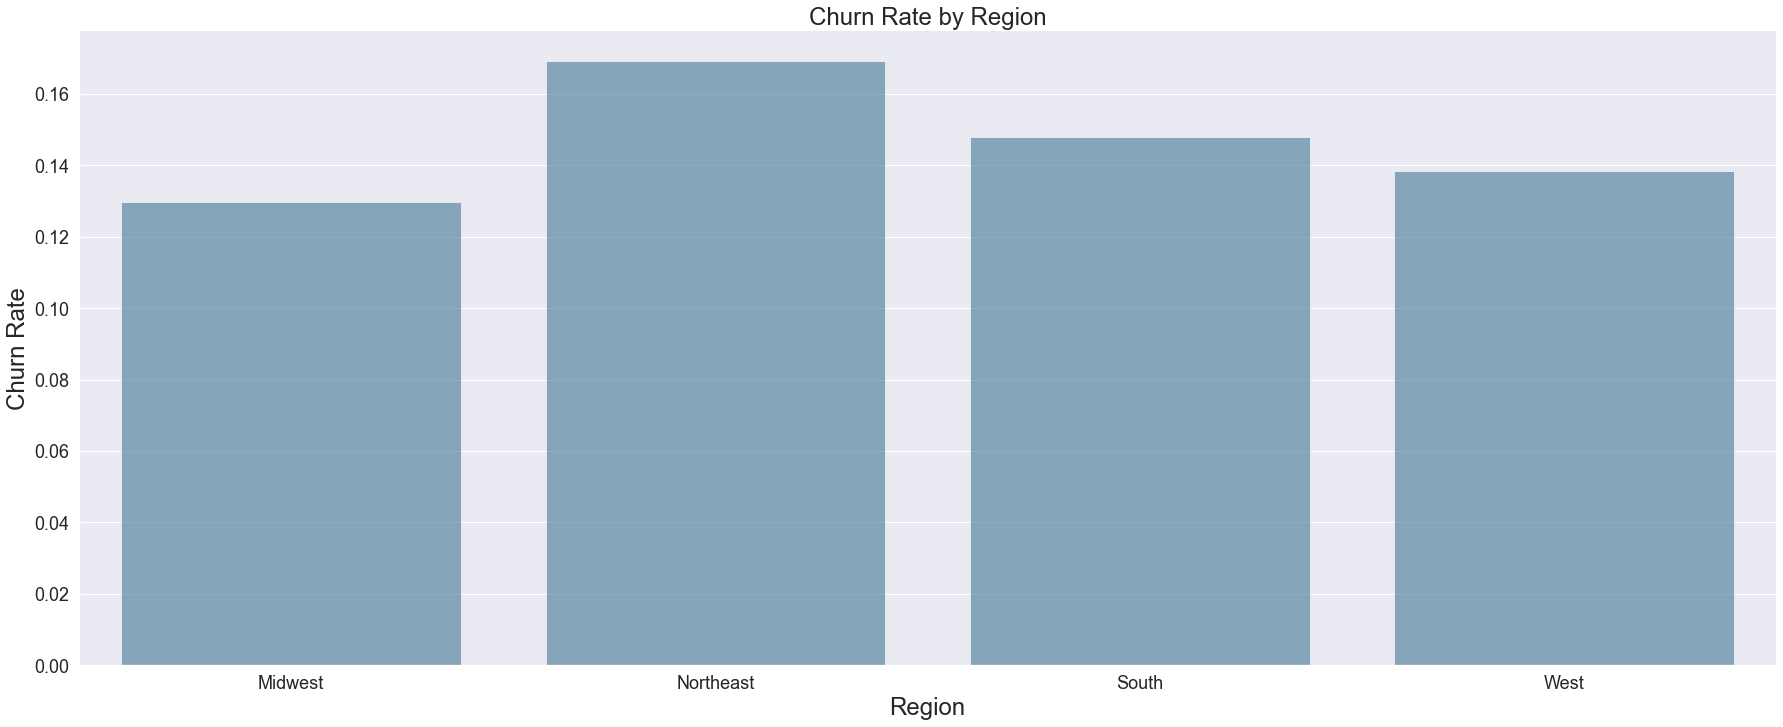

In [340]:
df_region = pd.DataFrame(df.groupby('region')['churn'].value_counts(normalize=True))
df_region.columns = ['value']
df_region = df_region.reset_index()
g = sns.catplot(data = df_region[df_region.churn == 1], kind = 'bar',
            x = 'region', y = 'value', hue = 'churn',
            palette = 'mako', alpha = .6, height = 10, aspect = 2.5, legend = False);
plt.title('Churn Rate by Region', fontsize = 24)
plt.xlabel('Region', fontsize = 24)
plt.ylabel('Churn Rate', fontsize = 24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [341]:
df_region[(df_region.churn == 1)]

,region,churn,value
1,Midwest,1,0.129676
3,Northeast,1,0.169205
5,South,1,0.147881
7,West,1,0.138387


Based off these results, it seems as though customers in the Northeast and South churn at a higher rate than customers in the Midwest or West. Therefore, it is recommended for the stakeholders to evaluate the performance of their towers in these regions as well as once again analyze the competitors in those specific regions to see if an alteration to their business model will lead to a lower churn rate. Next let's further build on this work but also transition to answering our next question:

## Do customers that churn call customer service more?

To answer this let's first evaluate the number of customer service calls by region based on whether the customer churned or not:

In [342]:
df.groupby(['region','churn'])['customer_service_calls'].mean()

region     churn
Midwest    0        1.383954
           1        2.057692
Northeast  0        1.429735
           1        2.140000
South      0        1.503704
           1        2.292683
West       0        1.456704
           1        2.373913
Name: customer_service_calls, dtype: float64

It seems like customers who turn call customer service more on average in every region. Let's next evaluate the total dataset without grouping it by region to see if customers who churn call customer service more.

In [343]:
df.groupby('churn')['customer_service_calls'].mean()

churn
0    1.449825
1    2.229814
Name: customer_service_calls, dtype: float64

As seen by the results above, customers who churn call customer service an average of .78 more times. Let's next visualize these insights by looking at the number of customer service calls and churn rate via a bar plot

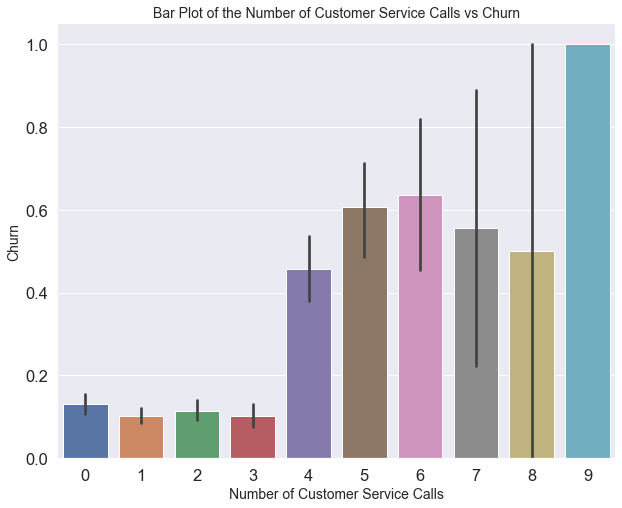

In [385]:
customer_service = df.groupby('customer_service_calls')['churn'].agg(['count'])
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.barplot(x = 'customer_service_calls', y = 'churn',
                    data = df);
plt.xlabel('Number of Customer Service Calls',fontsize = 14);
plt.ylabel('Churn',fontsize = 14);
plt.title('Bar Plot of the Number of Customer Service Calls vs Churn',fontsize = 14);
plt.savefig('images/customer_service.png',transparent=True)

As the barplot indicates, the more a customer calls customer service the more likely they are to churn. To further visualize this insight, let's create a boxplot that evaluates the number of customer service calls and whether the customer churns or not.

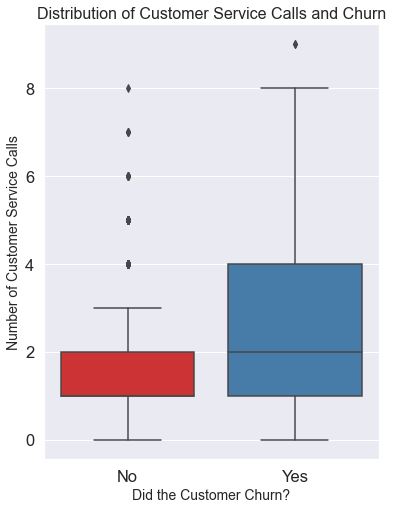

In [345]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.boxplot(x = 'churn', y = 'customer_service_calls', data = df, palette = "Set1")
plt.title('Distribution of Customer Service Calls and Churn',fontsize = 16)
plt.ylabel('Number of Customer Service Calls',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'])
plt.show()

The analysis for this question has made the insight clear: customers who call customer service more are more likely to churn. With this being said, it is recommended to take into account the number of times a customer calls customer service and work to appease said customers via promotions, discounts, or anything else that would increase the customer's likeness of the company and in turn increase the odds that they do not churn. Furthermore, let's analyze the same figure as seen above but also evaluate whether the customer has an international plan. 

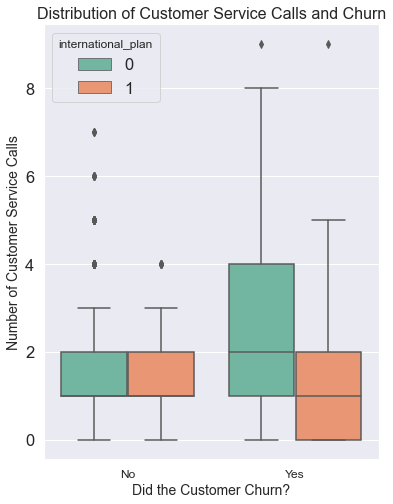

In [346]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.boxplot(x = 'churn', y = 'customer_service_calls', hue = 'international_plan', data = df, 
                palette = "Set2")
plt.title('Distribution of Customer Service Calls and Churn',fontsize = 16)
plt.ylabel('Number of Customer Service Calls',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'], fontsize = 12)
plt.show(g)

The insight from this allows us to make the recommendation that extra focus should be had on customers who do not have an international plan and call customer service more as they are more likely to churn when compared to customers who churn but are on an international plan. 

## Further Analysis
To further find insight into the data let's iterate through each of the columns and look at the mean value for each when grouping the data by whether the customer churns or not. 

In [347]:
columns = ['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
           'total_minutes', 'total_calls', 'total_charge',
       'day_charge_per_call', 'eve_charge_per_call', 'night_charge_per_call',
       'intl_charge_per_call', 'total_charge_per_call', 'day_charge_per_min',
       'eve_charge_per_min', 'night_charge_per_min', 'intl_charge_per_min',
       'total_charge_per_min']

for column in columns:
    print('-------------------------')
    print(column)
    print(df.groupby('churn')[column].mean())
print('-------------------------')

-------------------------
number_vmail_messages
churn
0    8.604561
1    5.115942
Name: number_vmail_messages, dtype: float64
-------------------------
total_day_minutes
churn
0    175.175754
1    206.914079
Name: total_day_minutes, dtype: float64
-------------------------
total_day_calls
churn
0    100.283158
1    101.335404
Name: total_day_calls, dtype: float64
-------------------------
total_day_charge
churn
0    29.780421
1    35.175921
Name: total_day_charge, dtype: float64
-------------------------
total_eve_minutes
churn
0    199.043298
1    212.410145
Name: total_eve_minutes, dtype: float64
-------------------------
total_eve_calls
churn
0    100.038596
1    100.561077
Name: total_eve_calls, dtype: float64
-------------------------
total_eve_charge
churn
0    16.918909
1    18.054969
Name: total_eve_charge, dtype: float64
-------------------------
total_night_minutes
churn
0    200.133193
1    205.231677
Name: total_night_minutes, dtype: float64
-------------------------
total_

It looks like from this, a point of focus can be the total charge so let's go ahead and plot this in the form of a bar plot to visualize the difference.

65.35596273291922
58.44880701754379


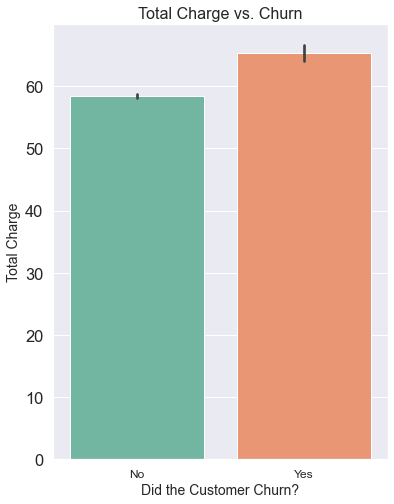

In [400]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.barplot(x = 'churn', y = 'total_charge', data = df, palette = "Set2")
plt.title('Total Charge vs. Churn',fontsize = 16)
plt.ylabel('Total Charge',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'], fontsize = 12)
plt.savefig('images/total_charge.png',transparent=True)
print(df.total_charge[df.churn == 1].mean())
print(df.total_charge[df.churn == 0].mean())
plt.show()

It does indeed look like customers who have a higher total charge tend to churn more. These insights that have been found during this exploratory process will be helpful in confirming the results of our models which we now can begin.

# Model

We now have prepared and analyzed the data enough to begin the modeling process. First let's define some functions that will help us in analyzing the results of the model. 

In [349]:
def plot_roc(model, X_train, X_test, y_train, y_test):

    y_train_score = model.decision_function(X_train)
    y_test_score = model.decision_function(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(train_fpr, train_tpr, color = 'blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'darkorange',
             lw=lw, label='Test ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [350]:
def plot_roc_2(model, X_train, X_test, y_train, y_test):

    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xticks([i/20.0 for i in range(21)], fontsize = 10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [351]:
def confusion_matrix(model, X_test, y_test, name):

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred) * 100
    
    print('------------------------------------')
    print(f'Testing Accuracy Score for the {name} Classifier: {round(score,3)}%')
    print('------------------------------------')
    print('Classification Matrix:')
    print(classification_report(y_test, y_pred))

In [396]:
def plot_feature_importances(model, X, X_train, pipe, name):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    if pipe:
        plt.barh(range(n_features), model.steps[1][1].feature_importances_, align='center') 
    else:
        plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values, fontsize=13) 
    plt.xlabel('Importance', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance', fontsize=20)
    plt.savefig(f'images/feature_importance_{name}.png',transparent=True, bbox_inches='tight')


Let's first split our data into a testing and training set. We will also drop all columns that have an object dtype. 

In [353]:
y = df['churn']
X = df.drop(['churn', 'state', 'area_code','region'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 23)

## Logistic Regression Model

The first model we will run is a logistic regression model using a pipeline. From there we will evaluate the model's results.

In [354]:
scaler = StandardScaler()
model = LogisticRegression(fit_intercept=False, 
                           C=10e16,  
                           solver='liblinear',
                           class_weight='balanced', 
                           max_iter=10000, 
                           random_state=123) 
pipeline_lr = Pipeline(steps=[('ss', scaler), 
                              ('m', model)])

pipeline_lr.fit(X_train, y_train)

print('Train Score:', pipeline_lr.score(X_train, y_train))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.7927170868347339
Test Score: 0.8069544364508393


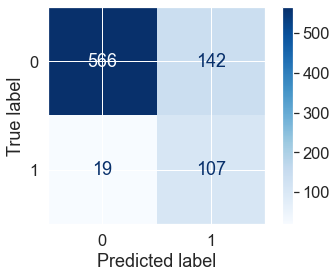

------------------------------------
Testing Accuracy Score for the Logistic Regression Classifier: 80.695%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       708
           1       0.43      0.85      0.57       126

    accuracy                           0.81       834
   macro avg       0.70      0.82      0.72       834
weighted avg       0.89      0.81      0.83       834



In [355]:
confusion_matrix(pipeline_lr, X_test, y_test, 'Logistic Regression')

Train AUC: 0.8434955681619052
Test AUC: 0.8734754730517441
------------------------------------


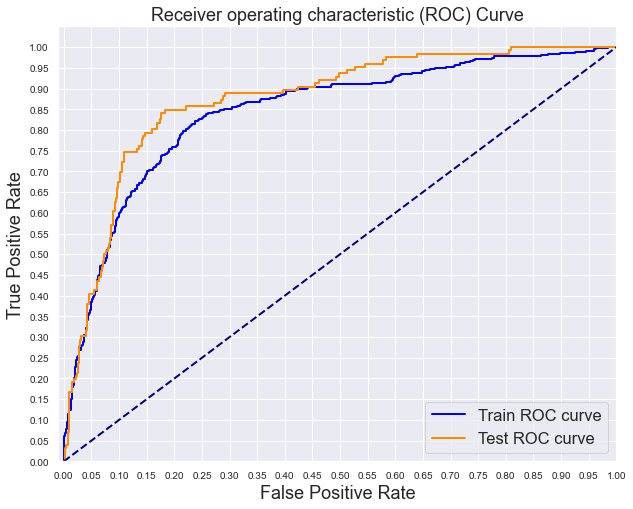

In [356]:
plot_roc(pipeline_lr, X_train, X_test, y_train, y_test)

From this we see that our model predicts 80.695% of the test dataset correctly. In addition, there seems to be a lot more false positives. To address these issues let's focus on class imbalance by altering the training data set via Synthetic Minority Oversampling.

In [357]:
print(y_train.value_counts())
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 
print(y_train_resampled.value_counts())

0    2142
1     357
Name: churn, dtype: int64
1    2142
0    2142
Name: churn, dtype: int64


In [358]:
pipeline_lr.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_lr.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_lr.score(X_test, y_test))

Train Score: 0.9126984126984127
Test Score: 0.8776978417266187


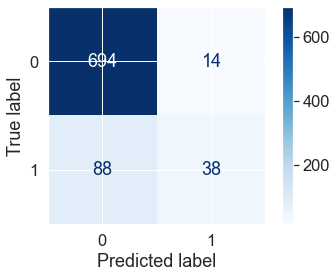

------------------------------------
Testing Accuracy Score for the Logistic Regression Classifier: 87.77%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       708
           1       0.73      0.30      0.43       126

    accuracy                           0.88       834
   macro avg       0.81      0.64      0.68       834
weighted avg       0.86      0.88      0.86       834



In [359]:
confusion_matrix(pipeline_lr, X_test, y_test, 'Logistic Regression')

Train AUC: 0.9611153829723611
Test AUC: 0.8645412967446865
------------------------------------


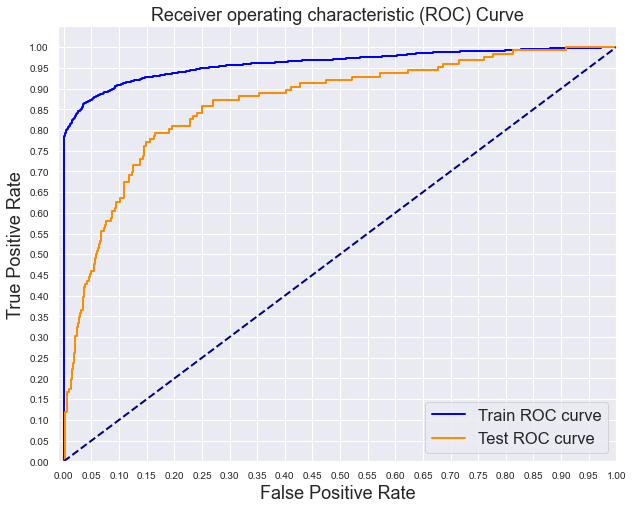

In [360]:
plot_roc(pipeline_lr, X_train_resampled, X_test, y_train_resampled, y_test)

### Logistic Regression Model Discussion

Implementing SMOTE helped to increase the testing accuracy from 80.695% to 87.29%. It also led to an increase in the test and train AUC as evident by the ROC curve. Therefore, the Logistic Regression Model will be used with SMOTE going forward when interpreting.

## K-nearest Neighbors

Let's next create a model using K-nearest Neighbors. The initial model will consist of 5 neighbors as the input parameter.


In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors=5)


pipeline_knn = Pipeline(steps=[('ss', scaler), 
                              ('m', knn_clf)])

pipeline_knn.fit(X_train, y_train)

print('Train Score:', pipeline_knn.score(X_train, y_train))
print('Test Score:', pipeline_knn.score(X_test, y_test))

Train Score: 0.9255702280912365
Test Score: 0.8908872901678657


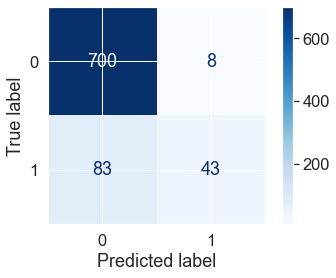

------------------------------------
Testing Accuracy Score for the KNN Classifier: 89.089%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       708
           1       0.84      0.34      0.49       126

    accuracy                           0.89       834
   macro avg       0.87      0.66      0.71       834
weighted avg       0.89      0.89      0.87       834



In [362]:
confusion_matrix(pipeline_knn, X_test, y_test, 'KNN')

Train AUC: 0.9608856614541242
Test AUC: 0.8609317549995517
------------------------------------


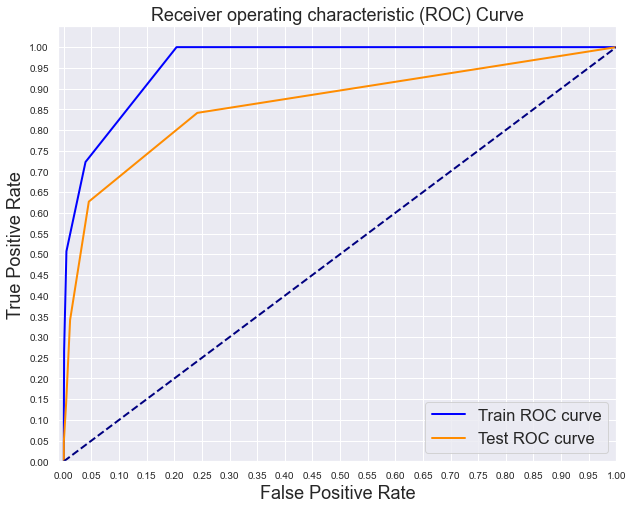

In [363]:
plot_roc_2(pipeline_knn, X_train, X_test, y_train, y_test)

This model already performs better than the Logistic Regression Model in terms of testing accuracy. It also has similar performance in terms of AUC as seen by the ROC curves. Let's next try to implement SMOTE in hopes to get a more accurate model by addressing the class imbalance.

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors=5)


pipeline_knn = Pipeline(steps=[('ss', scaler), 
                              ('m', knn_clf)])

pipeline_knn.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_knn.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_knn.score(X_test, y_test))

Train Score: 0.9248366013071896
Test Score: 0.7757793764988009


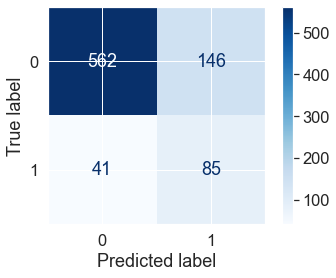

------------------------------------
Testing Accuracy Score for the KNN Classifier: 77.578%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       708
           1       0.37      0.67      0.48       126

    accuracy                           0.78       834
   macro avg       0.65      0.73      0.67       834
weighted avg       0.85      0.78      0.80       834



In [365]:
confusion_matrix(pipeline_knn, X_test, y_test, 'KNN')

Train AUC: 0.9923812662319831
Test AUC: 0.8010660478880818
------------------------------------


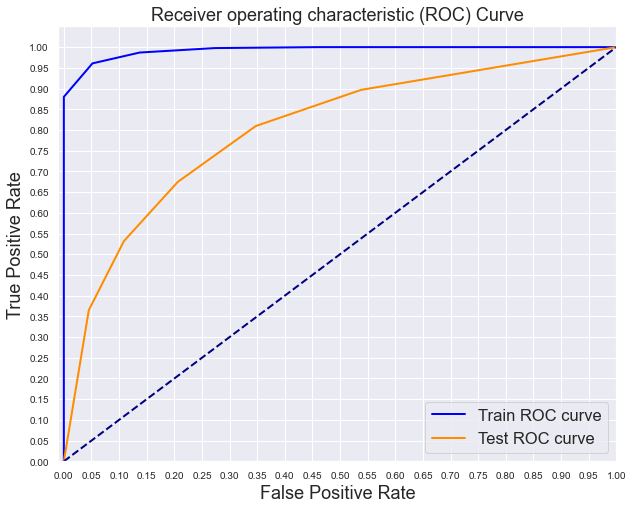

In [366]:
plot_roc_2(pipeline_knn, X_train_resampled, X_test, y_train_resampled, y_test)

This led to significantly worse results so this model will be out of the question and no longer implemented. Let's next assess what the best number of neighbors should be in the input parameter for the KNN Classifier. From there, we will then create a model with the best "n_neighbors" value found. 

In [367]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    best_k_auc = 0
    best_auc = 0
    for k in range(min_k, max_k+1, 2):
        scaler = StandardScaler()
        knn = KNeighborsClassifier(n_neighbors=k)
        pipeline_knn = Pipeline(steps=[('ss', scaler), 
                              ('m', knn)])
        pipeline_knn.fit(X_train, y_train)
        preds = pipeline_knn.predict(X_test)
        test_acc = pipeline_knn.score(X_test, y_test)
        y_test_score = pipeline_knn.predict_proba(X_test)
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
        test_auc = auc(test_fpr, test_tpr)
        y_train_score = pipeline_knn.predict_proba(X_train)
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
        train_auc = auc(train_fpr, train_tpr)
        # takes into account the testing accuracy, test AUC, and train AUC to get an average
        test_score = np.mean(np.array([test_acc,test_auc,train_auc]))
        if test_score > best_score:
            best_k = k
            best_score = test_score
#         if test_auc > best_auc:
#             best_k_auc = k
#             best_auc = test_auc
    print("Best Value for k: {}".format(best_k))
    print("Testing Accuracy Score: {}".format(best_score))
    return best_k

#     print('---------------------------------')
#     print("Best Value for k: {}".format(best_k_auc))
#     print("Testing AUC: {}".format(best_auc))

In [368]:
k = find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 9
Testing Accuracy Score: 0.9097749991210399


In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()
knn_clf = KNeighborsClassifier(n_neighbors = k)


pipeline_knn = Pipeline(steps=[('ss', scaler), 
                              ('m', knn_clf)])

pipeline_knn.fit(X_train, y_train)

print('Train Score:', pipeline_knn.score(X_train, y_train))
print('Test Score:', pipeline_knn.score(X_test, y_test))

Train Score: 0.910764305722289
Test Score: 0.8884892086330936


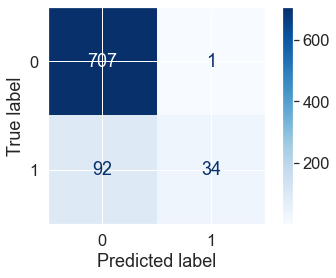

------------------------------------
Testing Accuracy Score for the KNN Classifier: 88.849%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       708
           1       0.97      0.27      0.42       126

    accuracy                           0.89       834
   macro avg       0.93      0.63      0.68       834
weighted avg       0.90      0.89      0.86       834



In [370]:
confusion_matrix(pipeline_knn, X_test, y_test, 'KNN')

Train AUC: 0.949094016691644
Test AUC: 0.8917417720383822
------------------------------------


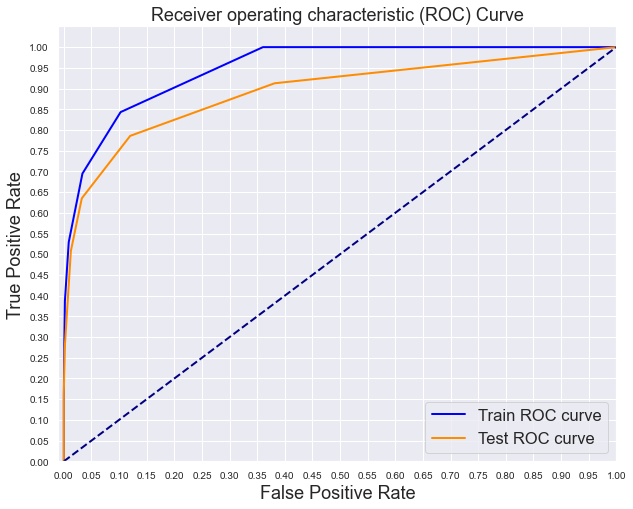

In [371]:
plot_roc_2(pipeline_knn, X_train, X_test, y_train, y_test)

### Discussion

While the modified KNN model improves on the test AUC and maintains acceptable testing accuracy and train AUC scores, the recall and f1 score for classifying customers that churn is still poor as seen by the score and the confusion matrix. These two criteria were improved by introducing SMOTE but at the expense of the testing accuracy. 

We can now transition to implementing a Decision Tree Model. 

## Decision Tree

Let's now implement a decision tree with the default parameters for the decision tree.

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 23)
scaler = StandardScaler()
dt_clf = DecisionTreeClassifier(random_state = 23)

pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt_clf)])

pipeline_dt.fit(X_train, y_train)

print('Train Score:', pipeline_dt.score(X_train, y_train))
print('Test Score:', pipeline_dt.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9484412470023981


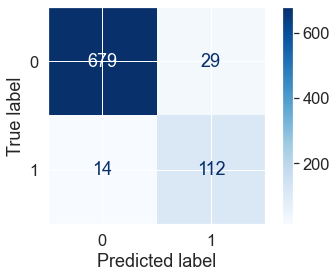

------------------------------------
Testing Accuracy Score for the Decision Tree Classifier: 94.844%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       708
           1       0.79      0.89      0.84       126

    accuracy                           0.95       834
   macro avg       0.89      0.92      0.90       834
weighted avg       0.95      0.95      0.95       834



In [373]:
confusion_matrix(pipeline_dt, X_test, y_test, 'Decision Tree')

Train AUC: 1.0
Test AUC: 0.9239642184557438
------------------------------------


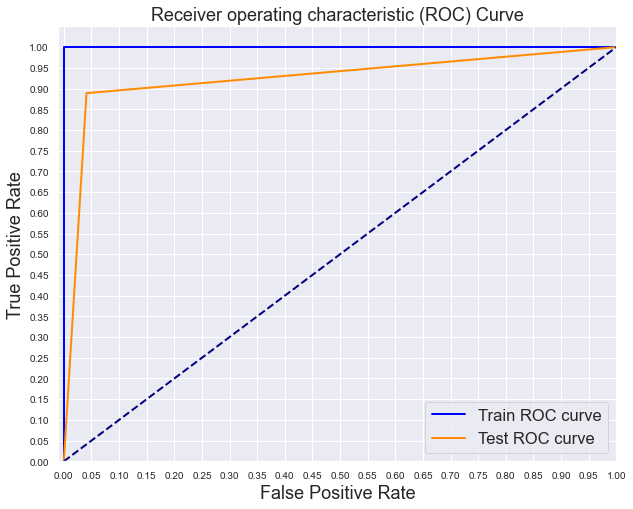

In [374]:
plot_roc_2(pipeline_dt, X_train, X_test, y_train, y_test)

This model performs very well. To further enhance this model, let's perform hyperparameter tuning and pruning to find better parameters for the decision tree model than just the default parameters. Let's first focus on the max tree depth.

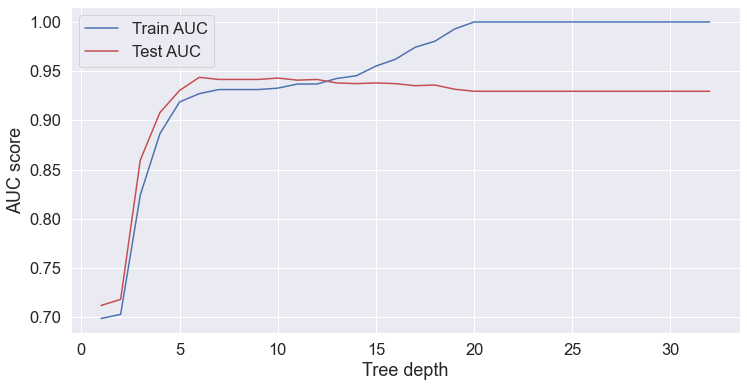

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


In [380]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state = 23)
    pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipeline_dt.fit(X_train, y_train)
    train_pred = pipeline_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = pipeline_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()
print(max_depths)

It seems as though the Test AUC is maximized at a tree depth of 6. We will go with this value for now. Let's next focus on the minimum sample splits. 

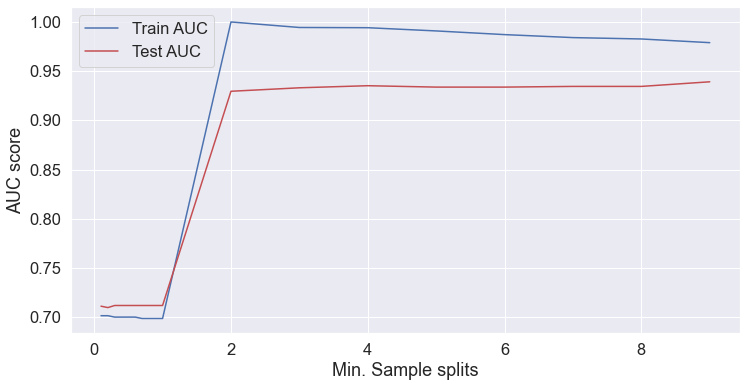

In [376]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_splits = np.append(min_samples_splits,np.array(range(2,10)))
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    if min_samples_split > 1:
        min_samples_split = int(min_samples_split)
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = min_samples_split,random_state = 23)
    pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipeline_dt.fit(X_train, y_train)
    train_pred = pipeline_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipeline_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

The results from here are pretty straight forward and we will go with a minimum sample splits of 2. Let's next focus on minimum sample leaves. 

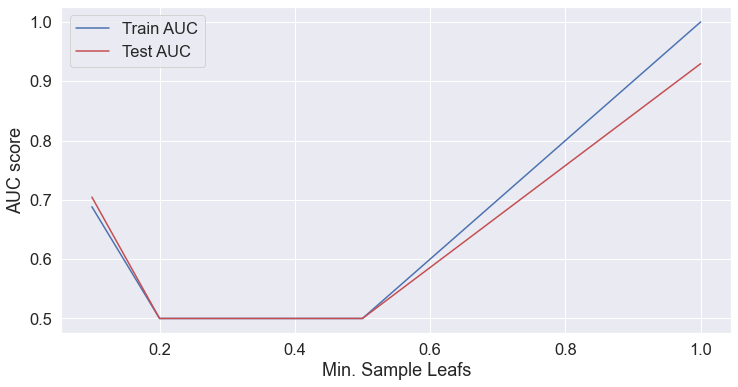

In [377]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
min_samples_leafs = np.append(min_samples_leafs,np.array(1))
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    if min_samples_leaf == 1.0:
        min_samples_leaf = int(min_samples_leaf)
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=23)
    pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipeline_dt.fit(X_train, y_train)
    train_pred = pipeline_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipeline_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

These results are again straightforward so we will go with a minimum sample leaf of 1. Let's next focus on the maximum amount of features. 

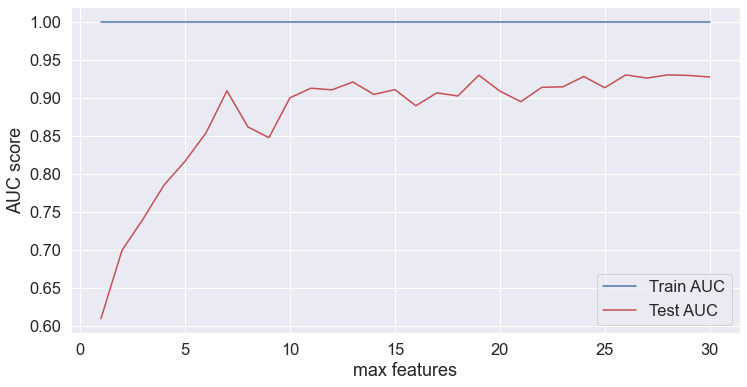

In [378]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=23)
    pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipeline_dt.fit(X_train, y_train)
    train_pred = pipeline_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipeline_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

From these results we can conclude that no maximum amount of features parameter is needed as there doesn't seem to be an exact value to choose from. Let's next focus on the weights of the classes in the model.

AUC for None: 0.9296139359698682
-------------------------------------------------------------------------------------
AUC for Balanced: 0.9289077212806026
-------------------------------------------------------------------------------------
AUC for 2 to 1: 0.9293449018025289
-------------------------------------------------------------------------------------
AUC for 10 to 1: 0.9303201506591338
-------------------------------------------------------------------------------------
AUC for 100 to 1: 0.9274952919020716
-------------------------------------------------------------------------------------
AUC for 1000 to 1: 0.9177091740651062
-------------------------------------------------------------------------------------


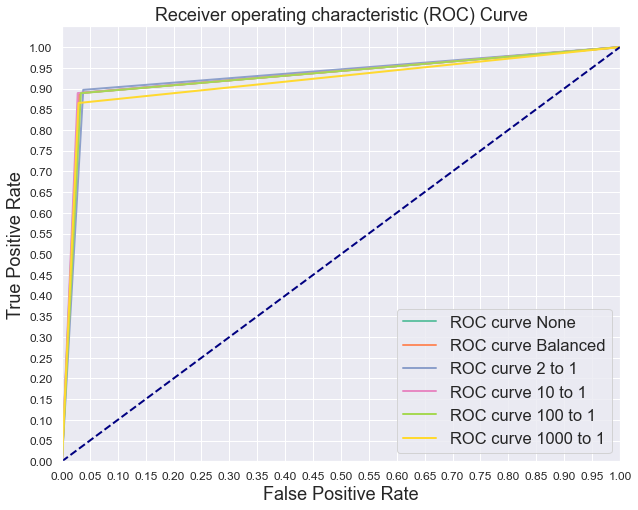

In [379]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    scaler = StandardScaler()
    dt = DecisionTreeClassifier(criterion='entropy', class_weight=weight, random_state=23)
    pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt)])
    pipeline_dt.fit(X_train, y_train)
    train_pred = pipeline_dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = pipeline_dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    print('AUC for {}: {}'.format(names[n], auc(false_positive_rate, true_positive_rate)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)], fontsize = 12)
plt.xticks([i/20.0 for i in range(21)], fontsize = 12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The best AUC score comes from a 10 to 1 weight ratio. We have now tuned the hyperparameters within this model and we can now create the new model with the newly found hyperparameters. 

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 23)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_clf = DecisionTreeClassifier(class_weight = {1:10, 0:1}, 
                                criterion = 'entropy',
                                max_depth = 6,
                                min_samples_leaf = 1,
                                min_samples_split = 2, 
                                random_state = 23)

dt_clf.fit(X_train_scaled, y_train)

print('Train Score:', dt_clf.score(X_train_scaled, y_train))
print('Test Score:', dt_clf.score(X_test_scaled, y_test))

Train Score: 0.976390556222489
Test Score: 0.9808153477218226


In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 23)

dt_clf = DecisionTreeClassifier(class_weight = {1:10, 0:1}, 
                                criterion = 'entropy',
                                max_depth = 6,
                                min_samples_leaf = 1,
                                min_samples_split = 2, 
                                random_state = 23)

pipeline_dt = Pipeline(steps=[('ss', scaler), 
                              ('m', dt_clf)])

pipeline_dt.fit(X_train, y_train)

print('Train Score:', pipeline_dt.score(X_train, y_train))
print('Test Score:', pipeline_dt.score(X_test, y_test))

Train Score: 0.976390556222489
Test Score: 0.9808153477218226


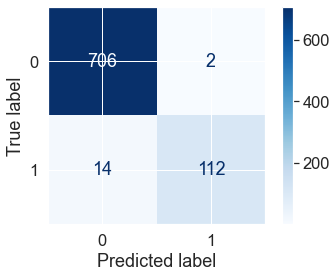

------------------------------------
Testing Accuracy Score for the Decision Tree Classifier: 98.082%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       708
           1       0.98      0.89      0.93       126

    accuracy                           0.98       834
   macro avg       0.98      0.94      0.96       834
weighted avg       0.98      0.98      0.98       834



In [287]:
confusion_matrix(pipeline_dt, X_test, y_test, 'Decision Tree')

Train AUC: 0.9486095091631424
Test AUC: 0.9399717514124294
------------------------------------


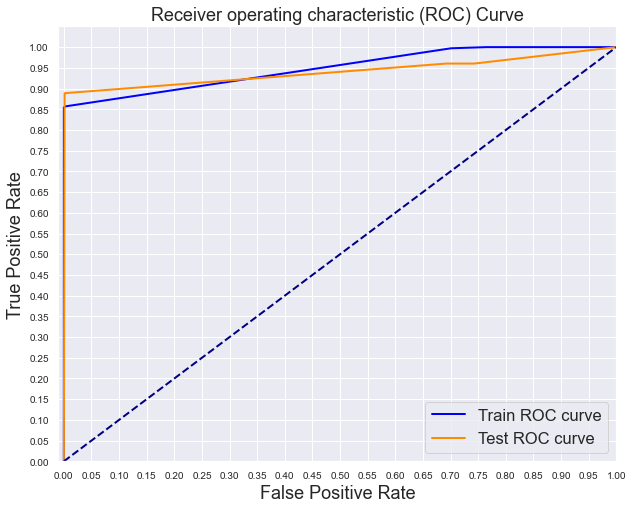

In [289]:
plot_roc_2(pipeline_dt, X_train, X_test, y_train, y_test)

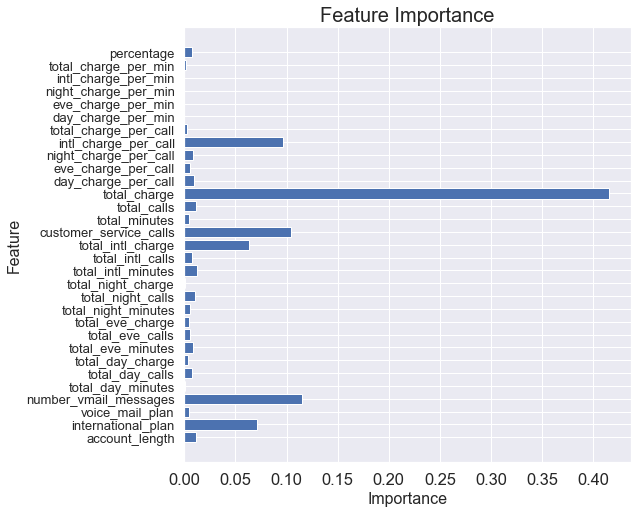

In [381]:
plot_feature_importances(pipeline_gbt, X, X_train, True,'decisiontree')

### Discussion 

This model has led to significant improvement in the recall and f1 score while also increasing the testing accuracy and having robust Train and Test AUC values as seen by the ROC curve above. 

## Random Forest

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 23)
scaler = StandardScaler()

rf_clf = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=20,random_state=23)

pipeline_rf = Pipeline(steps=[('ss', scaler), 
                              ('m', rf_clf)])

pipeline_rf.fit(X_train, y_train)

print('Train Score:', pipeline_rf.score(X_train, y_train))
print('Test Score:', pipeline_rf.score(X_test, y_test))

Train Score: 0.9303721488595438
Test Score: 0.920863309352518


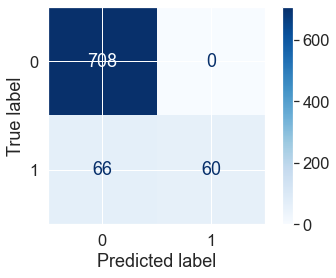

------------------------------------
Testing Accuracy Score for the Decision Tree Classifier: 92.086%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       708
           1       1.00      0.48      0.65       126

    accuracy                           0.92       834
   macro avg       0.96      0.74      0.80       834
weighted avg       0.93      0.92      0.91       834



In [291]:
confusion_matrix(pipeline_rf, X_test, y_test, 'Decision Tree')

Train AUC: 0.9397916029156761
Test AUC: 0.9340249753385346
------------------------------------


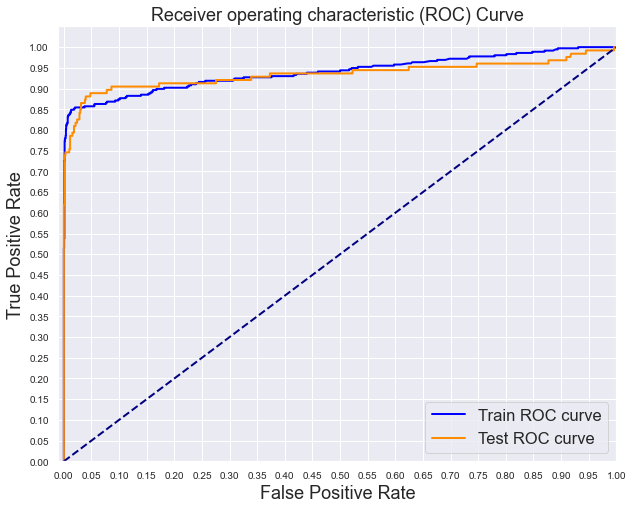

In [292]:
plot_roc_2(pipeline_rf, X_train, X_test, y_train, y_test)

This model performs worse than our best model (Decision Tree) and in addition there is quite a bit of false negatives. Let's try to address this issue by implementing SMOTE to the sample data.

In [293]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

scaler = StandardScaler()

rf_clf = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=20,random_state=23)

pipeline_rf = Pipeline(steps=[('ss', scaler), 
                              ('m', rf_clf)])

pipeline_rf.fit(X_train_resampled, y_train_resampled)

print('Train Score:', pipeline_rf.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_rf.score(X_test, y_test))


Train Score: 0.823062558356676
Test Score: 0.9424460431654677


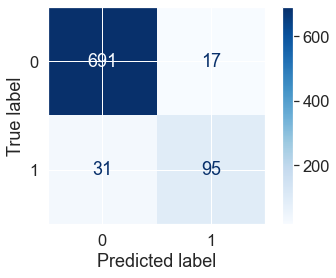

------------------------------------
Testing Accuracy Score for the Random Forest Classifier: 94.245%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       708
           1       0.85      0.75      0.80       126

    accuracy                           0.94       834
   macro avg       0.90      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834



In [294]:
confusion_matrix(pipeline_rf, X_test, y_test, 'Random Forest')

Train AUC: 0.945231578470168
Test AUC: 0.9054793292081428
------------------------------------


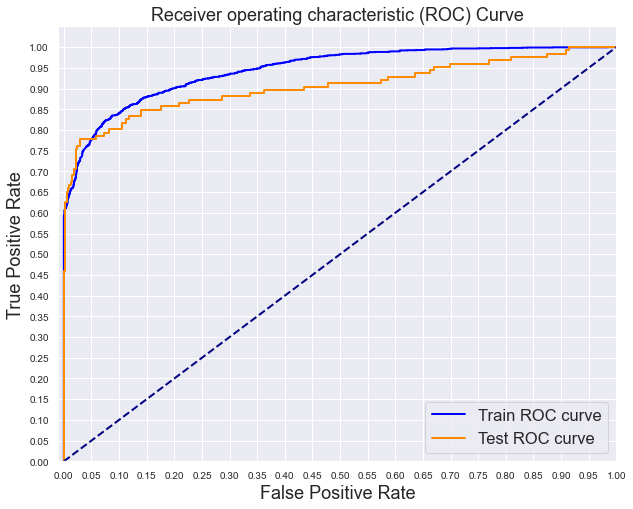

In [295]:
plot_roc_2(pipeline_rf, X_train_resampled, X_test, y_train_resampled, y_test)

### Discussion

This improved the every evaluation metric we have been looking at but it is still not better than our best model. Thus let's next implement Bagging Classification to our best model and its respective parameters.

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
scaler = StandardScaler()
bg =  BaggingClassifier(DecisionTreeClassifier(class_weight = {1:10, 0:1}, 
                                criterion = 'entropy',
                                max_depth = 6,
                                min_samples_leaf = 1,
                                min_samples_split = 2, 
                                random_state = 23), 
                                 n_estimators=20, 
                                 random_state=23) 
pipeline_bg = Pipeline(steps=[('ss', scaler), 
                              ('m', bg)])

pipeline_bg.fit(X_train, y_train)

print('Train Score:', pipeline_bg.score(X_train_resampled, y_train_resampled))
print('Test Score:', pipeline_bg.score(X_test, y_test))

Train Score: 0.8426704014939309
Test Score: 0.9796163069544365


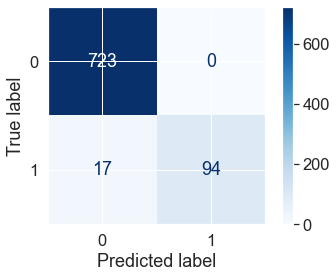

------------------------------------
Testing Accuracy Score for the Bagged Decision Tree Classifier: 97.962%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       723
           1       1.00      0.85      0.92       111

    accuracy                           0.98       834
   macro avg       0.99      0.92      0.95       834
weighted avg       0.98      0.98      0.98       834



In [297]:
confusion_matrix(pipeline_bg, X_test, y_test, 'Bagged Decision Tree')

Train AUC: 0.9888738492803737
Test AUC: 0.9204141901237337
------------------------------------


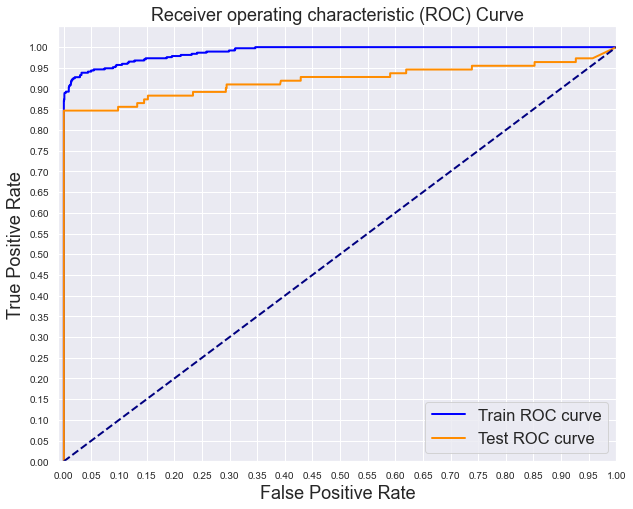

In [298]:
plot_roc_2(pipeline_bg, X_train, X_test, y_train, y_test)

### Discussion 

The results from this model are slightly worse in some of the metrics we have been evaluating such as testing accuracy, recall, and f1 score. Let's now transition to implementing AdaBoost Classifier.

## AdaBoost Classifier

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()

# Instantiate an AdaBoostClassifier
adb_clf = AdaBoostClassifier(random_state=23)


pipeline_adb = Pipeline(steps=[('ss', scaler), 
                              ('m', adb_clf)])

pipeline_adb.fit(X_train, y_train)

print('Train Score:', pipeline_adb.score(X_train, y_train))
print('Test Score:', pipeline_adb.score(X_test, y_test))
# Fit the model

Train Score: 0.929171668667467
Test Score: 0.9124700239808153


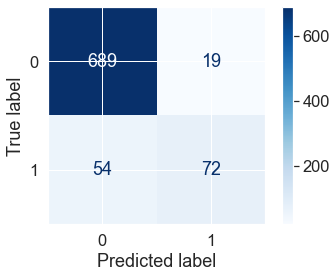

------------------------------------
Testing Accuracy Score for the AdaBoost Classifier: 91.247%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       708
           1       0.79      0.57      0.66       126

    accuracy                           0.91       834
   macro avg       0.86      0.77      0.81       834
weighted avg       0.91      0.91      0.91       834



In [300]:
confusion_matrix(pipeline_adb, X_test, y_test, 'AdaBoost')

Train AUC: 0.9455703850167518
Test AUC: 0.9145536274773562
------------------------------------


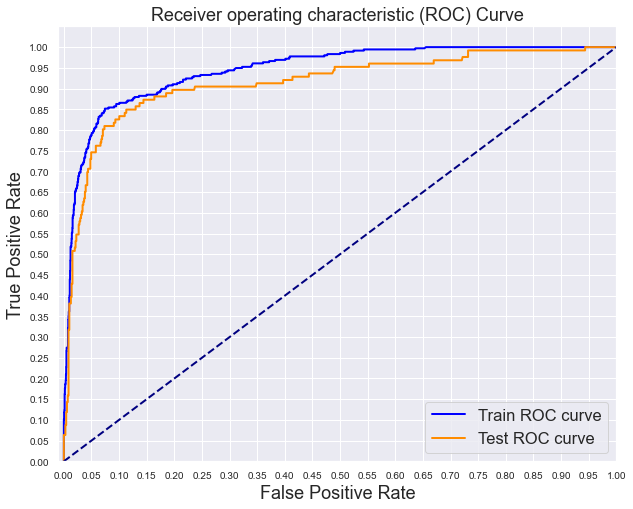

In [301]:
plot_roc_2(pipeline_adb, X_train, X_test, y_train, y_test)

It looks like the Decision Tree model still outperforms the AdaBoost Classifier as both the number of false positives and false negatives increased while the testing accuracy decreased. Thus, we can now transition to implementing a Gradient Boosting Classifier. 

## Gradient Boosting Classifier

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()

gbt_clf = GradientBoostingClassifier(random_state=23)


pipeline_gbt = Pipeline(steps=[('ss', scaler), 
                              ('m', gbt_clf)])

pipeline_gbt.fit(X_train, y_train)

print('Train Score:', pipeline_gbt.score(X_train, y_train))
print('Test Score:', pipeline_gbt.score(X_test, y_test))
# Fit the model

Train Score: 0.9823929571828731
Test Score: 0.9844124700239808


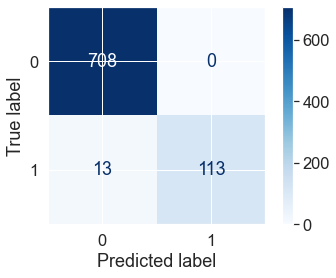

------------------------------------
Testing Accuracy Score for the Gradient Boost Classifier: 98.441%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       708
           1       1.00      0.90      0.95       126

    accuracy                           0.98       834
   macro avg       0.99      0.95      0.97       834
weighted avg       0.98      0.98      0.98       834



In [303]:
confusion_matrix(pipeline_gbt, X_test, y_test, 'Gradient Boost')

Train AUC: 0.996427982957889
Test AUC: 0.9507106985920546
------------------------------------


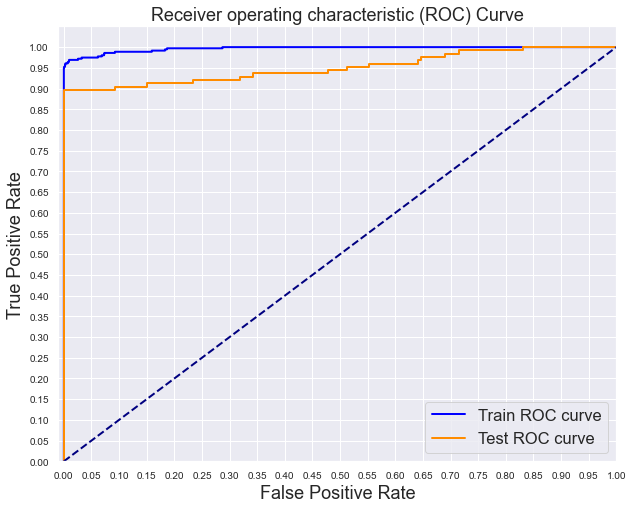

In [304]:
plot_roc_2(pipeline_gbt, X_train, X_test, y_train, y_test)

This model outperforms the Decision Tree model in every metric that we have been using to evaluate. Thus for now the two best models are a Decision Tree Classifier and the Gradient Boosting Classifier. Let's next implement XGBoost and analyze it's metrics.

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()

xgb_clf = xgb.XGBClassifier(max_depth=5, 
                            learning_rate=0.1, 
                            random_state=23)

pipeline_xgb = Pipeline(steps=[('ss', scaler), 
                              ('m', xgb_clf)])

pipeline_xgb.fit(X_train, y_train)

print('Train Score:', pipeline_xgb.score(X_train_over, y_train_over))
print('Test Score:', pipeline_xgb.score(X_test, y_test))


/Users/kiarashahmadi/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score: 0.9395424836601307
Test Score: 0.9844124700239808


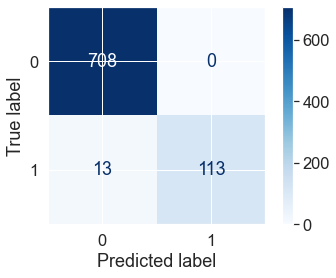

------------------------------------
Testing Accuracy Score for the XGBoost Classifier: 98.441%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       708
           1       1.00      0.90      0.95       126

    accuracy                           0.98       834
   macro avg       0.99      0.95      0.97       834
weighted avg       0.98      0.98      0.98       834



In [306]:
confusion_matrix(pipeline_xgb, X_test, y_test, 'XGBoost')

Train AUC: 0.9999869228737247
Test AUC: 0.9445453322571967
------------------------------------


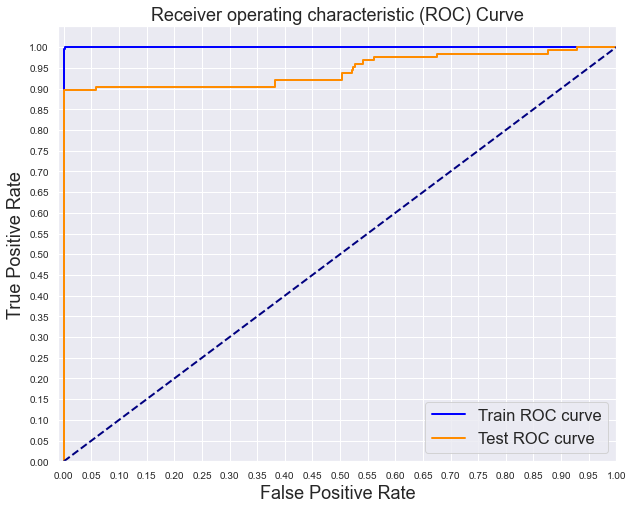

In [307]:
plot_roc_2(pipeline_xgb, X_train, X_test, y_train, y_test)

### Discussion 

This model has very similar performance when compared to the Gradient Boosting Classifier in terms of the testing accuracy and the amount of false positives and false negatives. However, the average of the test and train score are worse as well as the average of the train and test AUC. We now have 3 models with outstanding performance. What we will do now is perform grid search on the Gradient Boosting Classifier and XGBoost Classifier as the Decision Tree Classifier has been tuned and pruned and thus there is less of a need for a grid search. Let's first perform a GridSearch for XGBoost. 

## GridSearch for XGBoost and Gradient Boost

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 23)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_clf_gs = xgb.XGBClassifier(random_state = 23, eval_metric = 'logloss')

xgb_grid = {
            'learning_rate': [0.01, 0.1, 0.5], 
            'gamma': [ 0.01, 0.1], 
            'max_depth': [2, 5, 6, 10], 
            'min_child_weight': [0.1, 1, 10], 
            'subsample': [0.5, 0.7, 0.9], 
            'n_estimators': [5, 10, 20, 100],
            'scale_pos_weight' : [2, 5, 7, 9]}

xgb_gridsearch = GridSearchCV(estimator=xgb_clf_gs, 
                              param_grid=xgb_grid, 
                              cv=5, 
                              return_train_score=True,
                             )

xgb_gridsearch.fit(X_train_scaled, y_train)

print('Best Parameters for Our XGBoost Model:')
xgb_gridsearch.best_params_

/Users/kiarashahmadi/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best Parameters for Our XGBoost Model:


{'gamma': 0.01,
 'learning_rate': 0.5,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'scale_pos_weight': 2,
 'subsample': 0.9}

Now let's implement the model that the GridSearch has found and evaluate its metrics. 

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

scaler = StandardScaler()

xgb_clf = xgb.XGBClassifier(gamme = 0.01, learning_rate=0.5, max_depth = 6, min_child_weight = 1, 
                            n_estimators = 100, scale_pos_weight = 2, subsample = .9, random_state=23)

pipeline_xgb = Pipeline(steps=[('ss', scaler), 
                              ('m', xgb_clf)])

pipeline_xgb.fit(X_train, y_train)

print('Train Score:', pipeline_xgb.score(X_train_over, y_train_over))
print('Test Score:', pipeline_xgb.score(X_test, y_test))


/Users/kiarashahmadi/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { gamme } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:29:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score: 1.0
Test Score: 0.9820143884892086


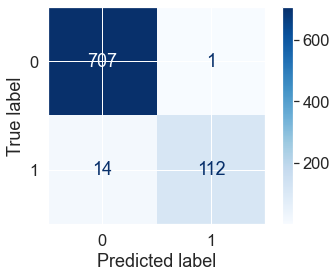

------------------------------------
Testing Accuracy Score for the XGBoost Classifier: 98.201%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       708
           1       0.99      0.89      0.94       126

    accuracy                           0.98       834
   macro avg       0.99      0.94      0.96       834
weighted avg       0.98      0.98      0.98       834



In [309]:
confusion_matrix(pipeline_xgb, X_test, y_test, 'XGBoost')

Train AUC: 1.0
Test AUC: 0.9566854990583804
------------------------------------


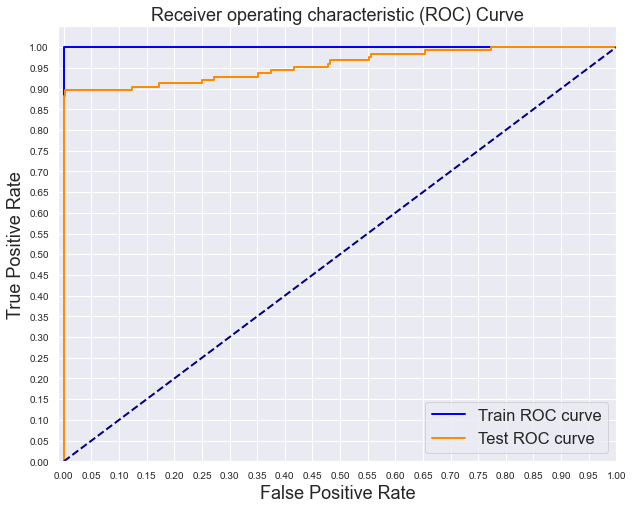

In [310]:
plot_roc_2(pipeline_xgb, X_train, X_test, y_train, y_test)

### Discussion 

The XGBoost Classifier found by GridSearch performs better in terms of test and train score and AUC. However, it has more false positives and negatives as well as a slightly lower testing accuracy. Thus, due to the nature of this dataset and problem in that we want to avoid false negatives, we will not use this model and consider the previous XGBoost model created which has a higher testing accuracy and less false positives and negatives. We can next perform a GridSearch for the Gradient Boosting Classifier: 

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 23)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_clf_gs = GradientBoostingClassifier(random_state = 23)

gb_grid = {   'learning_rate': [0.01, 0.1, 0.5], 
              'max_depth': [2, 5, 6, 10],
              'min_samples_leaf': [4,5,6],

              'subsample': [0.5, 0.7, 0.9],
              'n_estimators': [5, 10, 20, 100],
              }

gb_gridsearch = GridSearchCV(estimator=gb_clf_gs, 
                              param_grid=gb_grid, 
                              cv=5, 
                              return_train_score=True,
                             )

gb_gridsearch.fit(X_train_scaled, y_train)

print('Best Parameters for Our Gradient Boost Model:')
gb_gridsearch.best_params_

Best Parameters for Our Gradient Boost Model:


{'learning_rate': 0.5,
 'max_depth': 10,
 'min_samples_leaf': 6,
 'n_estimators': 100,
 'subsample': 0.9}

Let's now implement these new parameters into a Gradient Boost Model and evaluate its metrics.

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 23)

scaler = StandardScaler()

gbt_clf = GradientBoostingClassifier(learning_rate = 0.5, max_depth = 10, 
                                     min_samples_leaf = 6, n_estimators = 100, 
                                     subsample = 0.9, random_state=23)


pipeline_gbt = Pipeline(steps=[('ss', scaler), 
                              ('m', gbt_clf)])

pipeline_gbt.fit(X_train, y_train)

print('Train Score:', pipeline_gbt.score(X_train, y_train))
print('Test Score:', pipeline_gbt.score(X_test, y_test))
# Fit the model

Train Score: 1.0
Test Score: 0.9844124700239808


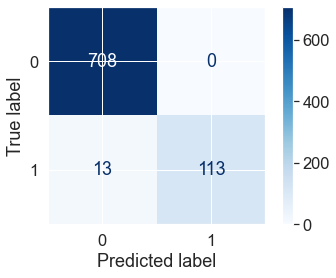

------------------------------------
Testing Accuracy Score for the Gradient Boost Classifier: 98.441%
------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       708
           1       1.00      0.90      0.95       126

    accuracy                           0.98       834
   macro avg       0.99      0.95      0.97       834
weighted avg       0.98      0.98      0.98       834



In [312]:
confusion_matrix(pipeline_gbt, X_test, y_test, 'Gradient Boost')

Train AUC: 1.0
Test AUC: 0.9493094789704959
------------------------------------


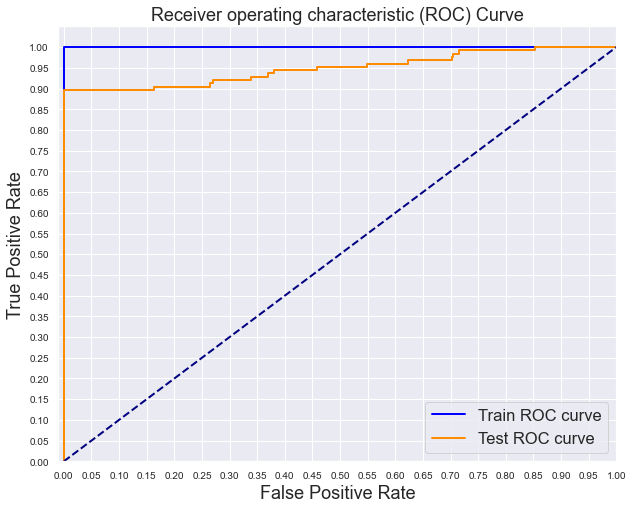

In [313]:
plot_roc_2(pipeline_gbt, X_train, X_test, y_train, y_test)

### Discussion 

This model performs as well as the previous Gradient Boost Model in terms of the number of false positives and negatives and testing accuracy. In addition it performs better in terms of test and train score. It does perform worse when it comes to test AUC but it performs better in train AUC. With that being said, this is our best model and will be the one we use going forward when it comes to interpretation.

# Interpret

To begin the interpret part of the OSEMiN Data Science Process, let's take our best which is the GridSearch Gradient Boost Classifier and evaluate the feature importance.

In [402]:
imp = pipeline_gbt.steps[1][1].feature_importances_
data = {}
for n,column in enumerate(list(X.columns)):
    data[column] = imp[n]
data
sorted_features = sorted(data.items(), key=lambda x: x[1], reverse=True)
sorted_features

[('total_charge', 0.41586379558596853),
 ('number_vmail_messages', 0.11482260172486596),
 ('customer_service_calls', 0.10390463018715958),
 ('intl_charge_per_call', 0.09658194713624106),
 ('international_plan', 0.0715360555520234),
 ('total_intl_charge', 0.06373383208133303),
 ('total_intl_minutes', 0.012011392314616452),
 ('total_calls', 0.011774293256955228),
 ('account_length', 0.011009178806200982),
 ('total_night_calls', 0.009973765588969062),
 ('day_charge_per_call', 0.009021446150999085),
 ('total_eve_minutes', 0.008375976025630822),
 ('night_charge_per_call', 0.0080684746929488),
 ('total_day_calls', 0.007791453944917881),
 ('total_intl_calls', 0.007642067325677084),
 ('percentage', 0.007550685215516107),
 ('eve_charge_per_call', 0.005655521419467554),
 ('total_night_minutes', 0.0051880634793404325),
 ('total_eve_calls', 0.005065441769438038),
 ('total_eve_charge', 0.004867012244949652),
 ('voice_mail_plan', 0.004757381883399714),
 ('total_minutes', 0.004275756068077951),
 ('to

In [403]:
(0.41586379558596853 - 0.11482260172486596) / 0.11482260172486596

2.621793874540897

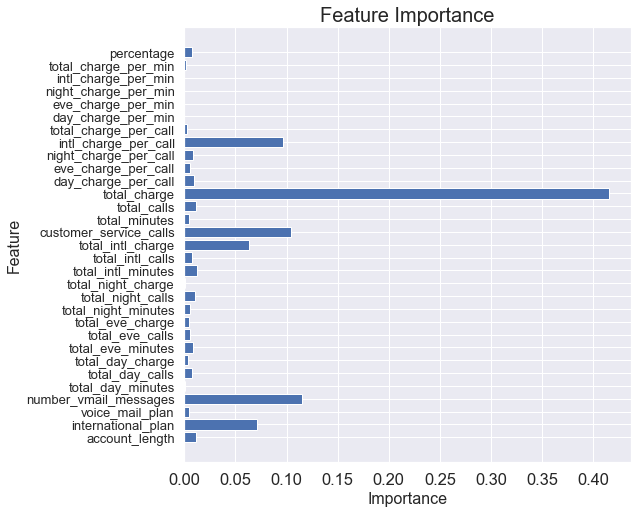

In [397]:
plot_feature_importances(pipeline_gbt, X, X_train, True,'gradientBoost')

From the figure above the top features that affect whether a customer will churn or not are:
1. Total Charge
2. Number of Voicemail Messages
3. Number of Customer Service Calls
4. International Charge per Call
5. International Plan
6. Total International Charge

These six features separate themselves in terms importance as seen by figure and code above. The bar plot created during the EDA process of the Total Charge vs Churn helps to confirm the result from this model that total_charge is the most important feature in predicting whether a customer will churn or not. Thus, the recommendation based off the findings from EDA and this model would be to focus on providing more low-cost benefits or discounts to higher paying customers as it has been shown they are more likely to churn. Let's next focus on the feature "Number of Voicemail Messages" via the bar graph below. 

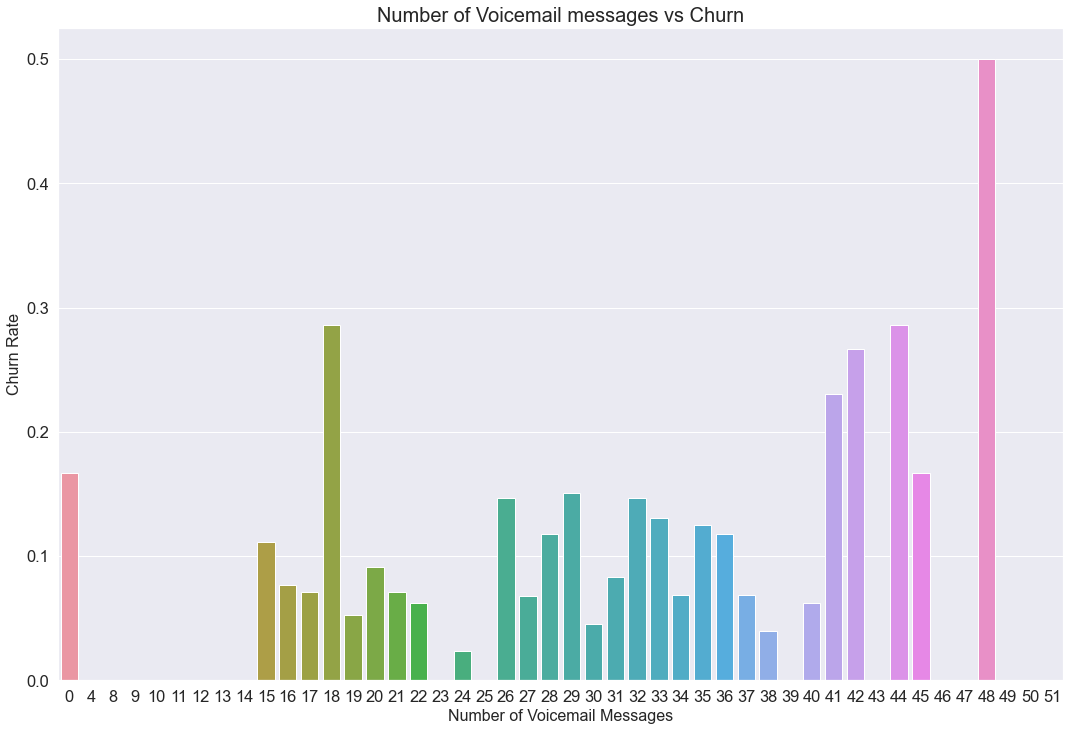

In [415]:
plt.figure(figsize=(18, 12))
sns.set_style('darkgrid')
sns.barplot(x = 'number_vmail_messages', y = 'churn',
                    data = df, ci = None);
plt.xlabel('Number of Voicemail Messages',fontsize = 16);
plt.ylabel('Churn Rate',fontsize = 16);
plt.title('Number of Voicemail messages vs Churn',fontsize = 20);
#plt.savefig('images/voicemail.png',transparent=True)

From this figure it seems as though some grouping can occur in order to gain more insight, thus let's group the data based on the figure created and analyze the percentage of customers that churned. 

In [162]:
print('Churn Value counts for Customers with 0 voicemail messages:')
print(df[(df.number_vmail_messages == 0) ].churn.value_counts(normalize = True))
print('Churn Value counts for Customers with 1-24 voicemail messages:')
print(df[(df.number_vmail_messages >= 1) & (df.number_vmail_messages < 25) ].churn.value_counts(normalize = True))
print('Churn Value counts for Customers with 25-39 voicemail messages:')
print(df[(df.number_vmail_messages >= 25) & (df.number_vmail_messages < 40) ].churn.value_counts(normalize = True))
print('Churn Value counts for Customers with more than 40 voicemail messages:')
print(df[(df.number_vmail_messages >= 40)].churn.value_counts(normalize = True))


Churn Value counts for Customers with 0 voicemail messages:
0    0.832849
1    0.167151
Name: churn, dtype: float64
Churn Value counts for Customers with 1-24 voicemail messages:
0    0.947368
1    0.052632
Name: churn, dtype: float64
Churn Value counts for Customers with 25-39 voicemail messages:
0    0.907718
1    0.092282
Name: churn, dtype: float64
Churn Value counts for Customers with more than 40 voicemail messages:
0    0.848101
1    0.151899
Name: churn, dtype: float64


These results indicate that customers who receive no voicemail messages churn the most. The key point to consider is to evaluate whether they have a voicemail plan option or not to ensure the data is being evaluated under the same circumstances. Thus, let's implement this and then analyze the results. 

In [164]:
print('Churn Value counts for Customers with 0 voicemail messages who have a voicemail plan:')
print(df[(df.number_vmail_messages == 0) & (df.voice_mail_plan == 1) ].churn.value_counts(normalize = True))
print('Churn Value counts for Customers with 1-24 voicemail messages:')
print(df[(df.number_vmail_messages >= 1) & (df.number_vmail_messages < 25) ].churn.value_counts(normalize = True))
print('Churn Value counts for Customers with 25-39 voicemail messages:')
print(df[(df.number_vmail_messages >= 25) & (df.number_vmail_messages < 40) ].churn.value_counts(normalize = True))
print('Churn Value counts for Customers with more than 40 voicemail messages:')
print(df[(df.number_vmail_messages >= 40)].churn.value_counts(normalize = True))

Churn Value counts for Customers with 0 voicemail messages who have a voicemail plan:
Series([], Name: churn, dtype: float64)
Churn Value counts for Customers with 1-24 voicemail messages:
0    0.947368
1    0.052632
Name: churn, dtype: float64
Churn Value counts for Customers with 25-39 voicemail messages:
0    0.907718
1    0.092282
Name: churn, dtype: float64
Churn Value counts for Customers with more than 40 voicemail messages:
0    0.848101
1    0.151899
Name: churn, dtype: float64


As the results indicate, there are no customers that have a voicemail plan and do not receive at least one voicemail. Thus, to evaluate this column properly let's only focus on customers who have a voicemail plan. 

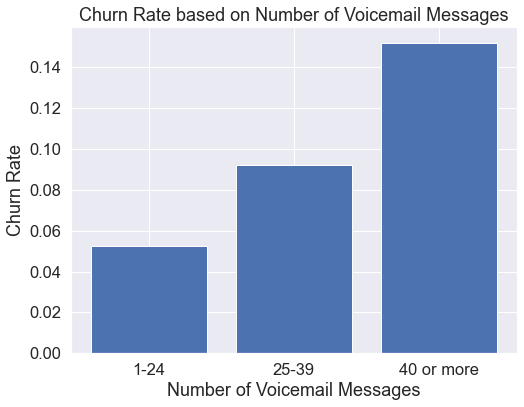

In [389]:
bin1 = df[(df.number_vmail_messages >= 1) & (df.number_vmail_messages < 25) ].churn.value_counts(normalize = True)[1]
bin2 = df[(df.number_vmail_messages >= 25) & (df.number_vmail_messages < 40) ].churn.value_counts(normalize = True)[1]
bin3 = df[(df.number_vmail_messages >= 40)].churn.value_counts(normalize = True)[1]
plt.figure(figsize = (8,6))
x = np.array(["1-24", "25-39", "40 or more"])
y = np.array([bin1, bin2, bin3])
plt.bar(x, y)
plt.title('Churn Rate based on Number of Voicemail Messages')
plt.xlabel('Number of Voicemail Messages')
plt.ylabel('Churn Rate')
plt.savefig('images/voicemail_binned.png',transparent=True)
plt.show()

This figure clearly shows that as customers have more voicemail messages, they are more likely to churn. The model helps to reiterate this finding and the recommendation to the stakeholders would be to look into improving the quality of their voicemail plan as the indication is the more frequent of a user one is of said plan, the more likely they are to churn. The next top feature is the number of customer service calls, and during the EDA process it was found that once a customer calls customer service 4 times, they are much more likely to churn. Thus, the recommendation here would be to ensure the customer's problems are resolved in less than 4 calls and if not then provide extra benefits to any customers who call customer service at least four times. In addition, training the customer service staff more would ideally lead to quick resolutions. The next important feature will be grouped with the other 2 top features following it as they all have to do with the international plan.

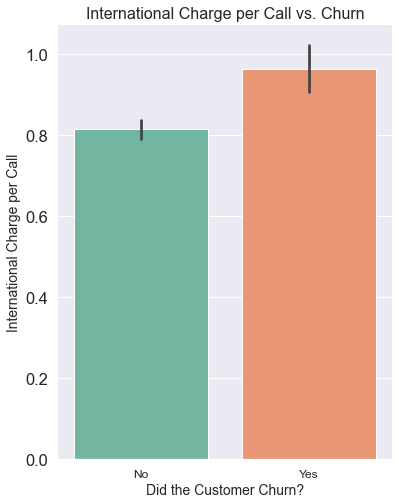

In [418]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.barplot(x = 'churn', y = 'intl_charge_per_call', data = df, palette = "Set2")
plt.title('International Charge per Call vs. Churn',fontsize = 16)
plt.ylabel('International Charge per Call',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'], fontsize = 12)
plt.savefig('images/int_charge_per_call.png',transparent=True, bbox_inches='tight')
plt.show()

As this figure indicates the customers that have a higher international charge per call tend to churn more. Let's next focus on evaluating churn rate based on whether the customer has an international plan or not. 

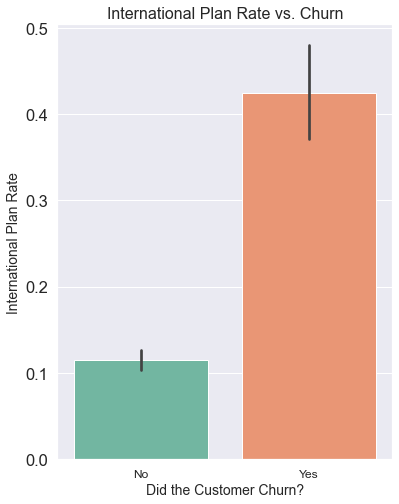

In [427]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.barplot(x = 'international_plan', y = 'churn', data = df, palette = "Set2")
plt.title('International Plan Rate vs. Churn',fontsize = 16)
plt.ylabel('International Plan Rate',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'], fontsize = 12)
plt.savefig('images/int_plan.png',transparent=True, bbox_inches='tight')
plt.show()

In [431]:
print(df.international_plan[df.churn == 1].mean())
print(df.international_plan[df.churn == 0].mean())

0.2836438923395445
0.06526315789473684


As this figure indicates, customers who have an international plan are much more likely to churn than those who do not. Let's next focus on the total international charge and what that does in terms of whether a customer churns or not.

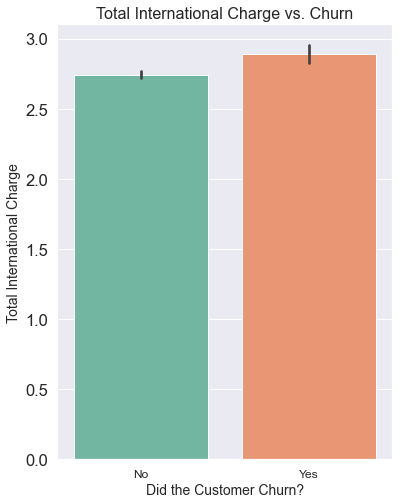

In [420]:
plt.figure(figsize = (6,8))
sns.set_style('darkgrid')
g = sns.barplot(x = 'churn', y = 'total_intl_charge', data = df, palette = "Set2")
plt.title('Total International Charge vs. Churn',fontsize = 16)
plt.ylabel('Total International Charge',fontsize = 14)
plt.xlabel('Did the Customer Churn?',fontsize = 14)
g.set_xticklabels(["No",'Yes'], fontsize = 12)
plt.savefig('images/total_int_charge.png',transparent=True, bbox_inches='tight')

The following figure only helps to reiterate the results from the figures before it and the model's feature importance in that customers who have a higher total international charge tend to churn more. These three figures help to provide insight that the international plan is causing the customer to churn more frequently. The recommendation from this would be to evaluate the overall scope of the international plan in hopes to decrease the charges for customers who have this plan as the indication is that they are not pleased with the charges and overall aspects of the plan. This could be due to competitor's prices for a similar international plan or quality of the plan in general but either way a full audit of the international plan would be helpful in helping to decrease the amount of customers that churn. 

# Conclusion:

Throughout this process we were able to create very accurate models that can predict whether a customer churns or not. The three most accurate models were: 
1. Gradient Boost Classifier with GridSearch tuning
2. XGBoost Classifier 
3. Decision Tree Classifier with Hyperparameter Tuning and Pruning 

The Gradient Boost Classifier has a testing accuracy of 98.441%, the highest recall and f1 score out of any models, as well as the lowest number of false negatives and false positives. From this model we were able to find the features that distinguish themselves from the rest. This consisted of six features that were: 
1. Total Charge
2. Number of Voicemail Messages
3. Number of Customer Service Calls
4. International Charge per Call
5. International Plan
6. Total International Charge

From this insight gained from these feature rankings and some exploratory data analysis the following recommendations can be given to the stakeholders:
- Focus on providing more low-cost benefits or discounts to higher paying customers as it has been shown they are more likely to churn.
- Improve the quality of the voicemail plan as the more a customer uses the voicemail plan, the more likely they are to churn.
- Ensure customer resolution is reached in less than 4 customer service calls and if not then provide extra benefits to any customers who call customer service at least four times. In addition, evaluate the customer service staff to assess whether more training is necessary to reach customer resolution quicker.
- Evaluate all aspects of the international plan in hopes to decrease the charges for customers who have this plan as the indication is that they are not pleased with the charges and overall aspects of the plan and thus more likely to churn. 

These recommendations along with the results of the model give the stakeholders immense insight in working to decrease the amount of customers that churn and it is all credited to the OSEMiN Data Science Process.